#Define Problem Statement and perform Exploratory Data Analysis

##**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Determine the creditworthiness
of potential borrowers using
various attributes, to ensure that
the loans are given to those
who are most likely to repay
them.



**From the company’s perspective:**

● LoanTap is at the forefront of offering tailored financial solutions to millennials.

● Their innovative approach seeks to harness data science for refining their credit underwriting process.

● The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behavior and creditworthiness.

● Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

● The insights gained can optimize loan disbursal, balancing customer outreach with risk management.


**From the learner’s perspective:**

● Tackling this case offers practical exposure to real-world financial data and its challenges.

● Logistic Regression, a foundational algorithm, is pivotal in binary outcomes like loan decisions.

● Participants will hone skills in data preprocessing, model evaluation, and understanding trade-offs, essential in the data science realm.

● The case emphasizes actionable insights, fostering the ability to drive
data-informed strategies in financial sectors.


**Dataset Explanation**: LoanTapData.csv
(Link: https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view?usp=sharing)

1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

**What is Expected?**

Assuming you are a data scientist at LoanTap, you are tasked with analyzing the
dataset to determine the creditworthiness of potential borrowers. Your ultimate objective
is to build a logistic regression model, evaluate its performance, and provide actionable
insights for the underwriting process.

##Initial Analysis

Importing libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
  confusion_matrix
  ,ConfusionMatrixDisplay
  ,accuracy_score
  ,precision_score
  ,recall_score
  ,f1_score
  ,roc_curve
  ,roc_auc_score
  ,precision_recall_curve
  ,auc
)

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold, cross_val_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [12]:
data = pd.read_csv('logistic_regression.csv')

In [13]:
data.shape

(396030, 27)

There are 396030 rows and 27 columns.
Total no of features = 26 as 'Loan Status' is target variable which our model should be predicting.
We have data about 396030 loan applications with their loan status which tells us whether borrower defaulted or not. Thus, it's supervised ML problem.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [15]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [16]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [17]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [18]:
cat_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'emp_title', 'title']

In [19]:
for col in cat_columns:
    print(data[col].value_counts())

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE   

In [20]:
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394274,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48816,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


1. Loan Amount has a range of [500, 40000] with median being 12000.
2. The term for the loan is usually 36 months.
3. Median interest rate on the loan is 13.3%.
4. Monthly repayment amount is having median value of ~ 375.
5. Most of the borrowers fall under loan grade 'B' and sub-grade 'B3' (Risk rating by LoanTap)
6. The most common borrower's job title is 'Teacher' and duration of employment is '10+ years'.
7. Borrower's housing situation is usually 'Mortgage'.
8. Median Annual Income is 64000. And, it's verified in the most cases as it's necessary before approving the loan.
9. Loan issuance month is Oct-2014 for most of the data-points here.
10. Loan status is 'Fully Paid' in most cases here which means non-defaulter is majority which is great for the company.
11. In most loan application cases, borrower's reason for the loan and the loan's title provided by the borrower is 'Debt consolidation'.
12. The dti (Monthly debt vs. monthly income ratio) has median value of 16.91
13. Date of borrower's oldest credit account is Oct-2000 in most cases.
14. Number of borrower's active credit lines has median value of 10.
15. Negative records on borrower's public credit profile has median of 0 which is superb.
16. Total credit balance has median value of ~11,000
17. Usage percentage of 'revolving' accounts like credit cards has median of 54.8
18. Total number of borrower's credit lines has median of 24.
19. Loan's first category has value 'f' in most cases.
20. Application type is mostly 'Individual'.
21. Number of borrower's mortgages has median value 1.
22. Bankruptcy records for borrower is 0 in 50% of cases.
23. Borrower's location is 'AE 70466' in the most cases.

## Data Exploration

In [21]:
data.groupby(by = 'loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The no of people those who have fully paid are 318357 and that of Charged Off are 77673.

In [22]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

The majority of people have home ownership as Mortgage and Rent.


Combining the minority classes as 'OTHER'.

In [23]:
data.loc[(data['home_ownership'] == 'ANY') | (data['home_ownership'] == 'NONE'), 'home_ownership'] = 'OTHER'
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [24]:
#Checking the distribution of OTHER

data.loc[data['home_ownership'] == 'OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

Issues in title, looks like values were manually entered

In [25]:
data['title'].value_counts()[:20]

title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: count, dtype: int64

In [26]:
data['title'] = data.title.str.lower()

In [27]:
data['title'].value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

##Univariate Analysis

###Continuous Variables

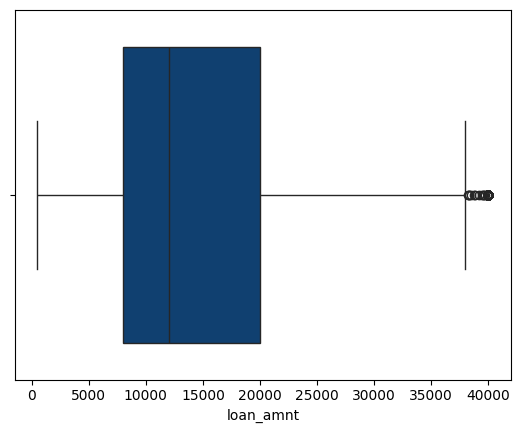

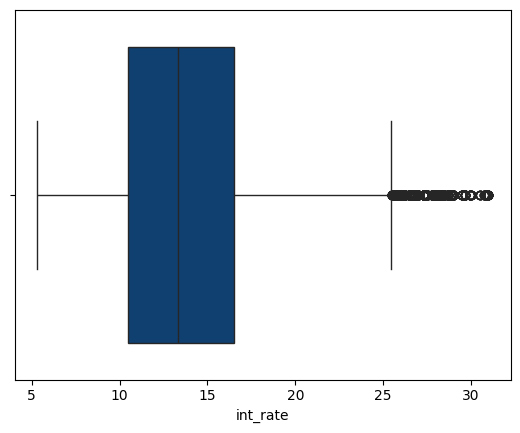

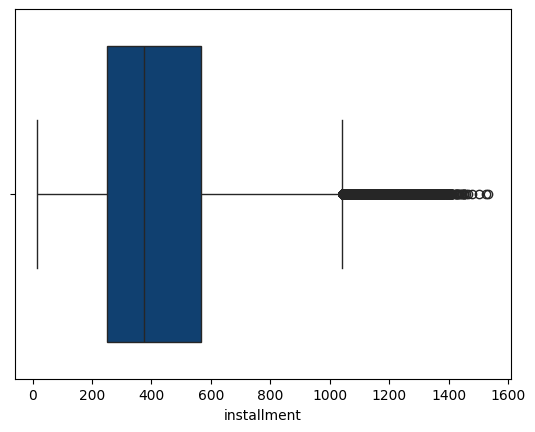

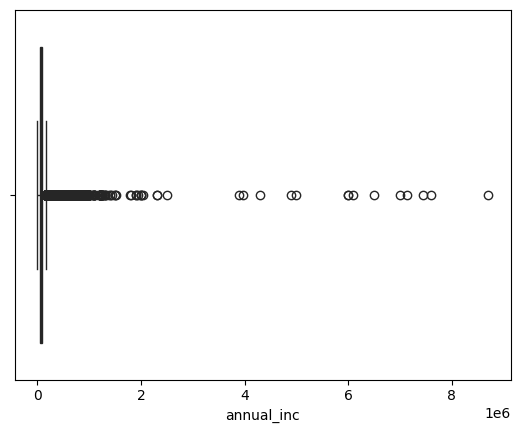

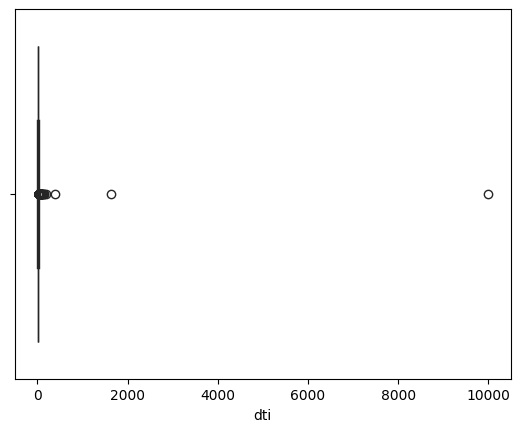

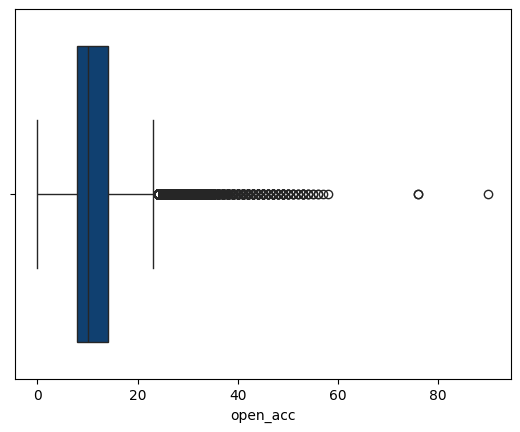

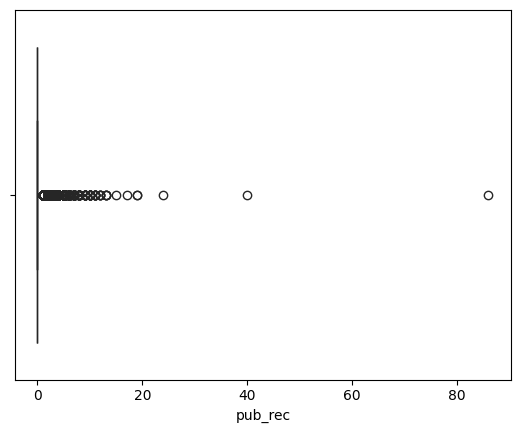

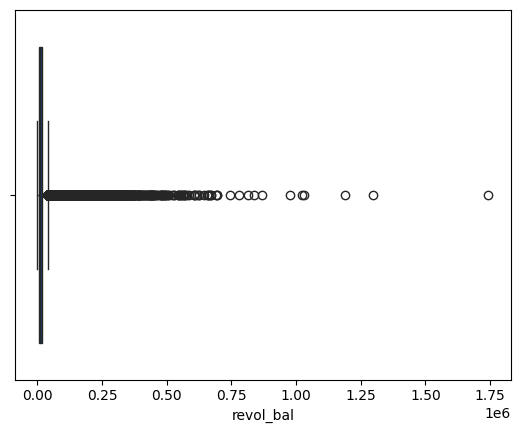

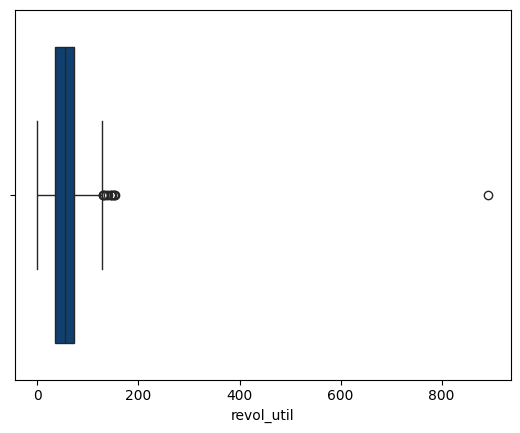

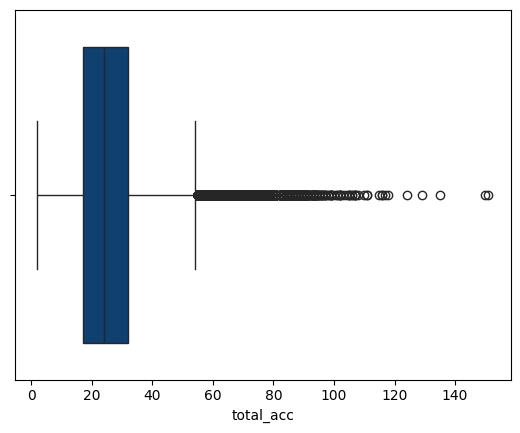

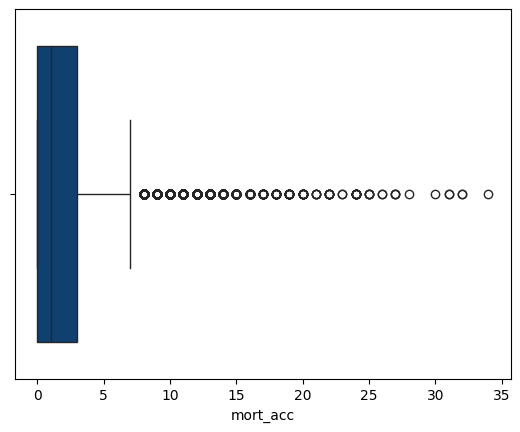

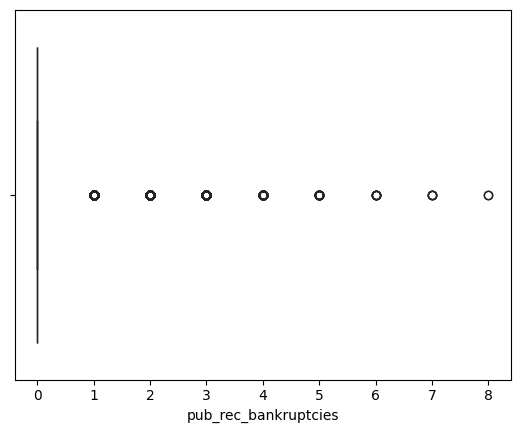

In [28]:
for col in data.columns:
  if data[col].dtype in ('float64', 'int64'):
    sns.boxplot(data = data, x = col, palette = 'ocean')
    plt.show()

The above box-plots tell us that there are outliers present in all the continuous variables.

###Categorical Variables

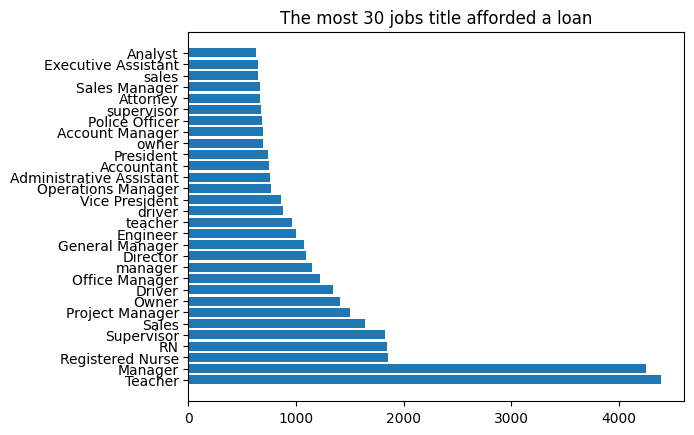

In [29]:
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.show()

The top 2 employee job roles for which we have the highest no of loan applications are 'Teacher' followed by 'Manager'.

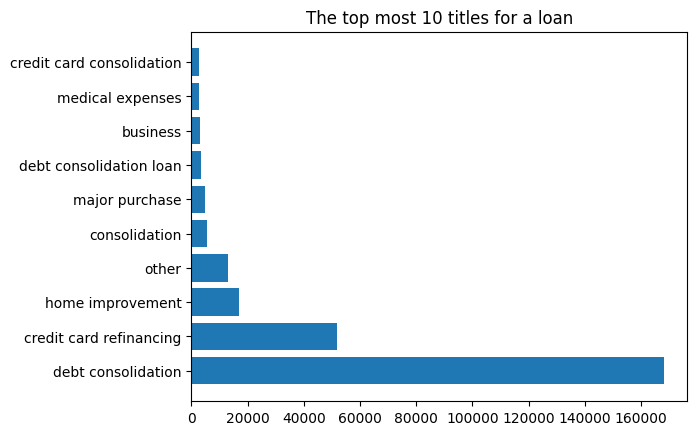

In [30]:
plt.barh(data.title.value_counts()[:10].index, data.title.value_counts()[:10])
plt.title("The top most 10 titles for a loan")
plt.show()

The loan's title provided by the borrower is 'Debt Consolidation' for the most no of applications.

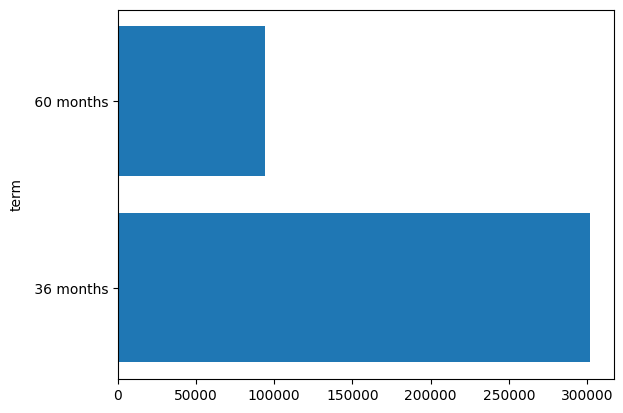

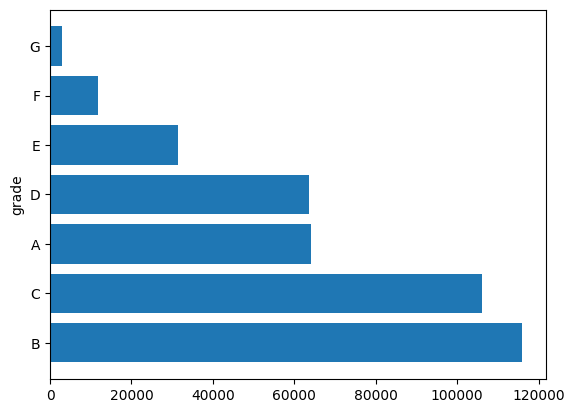

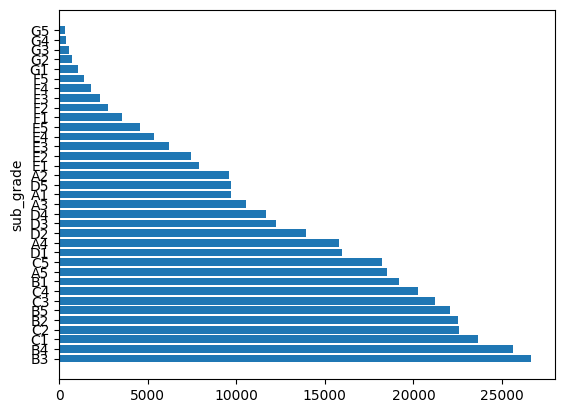

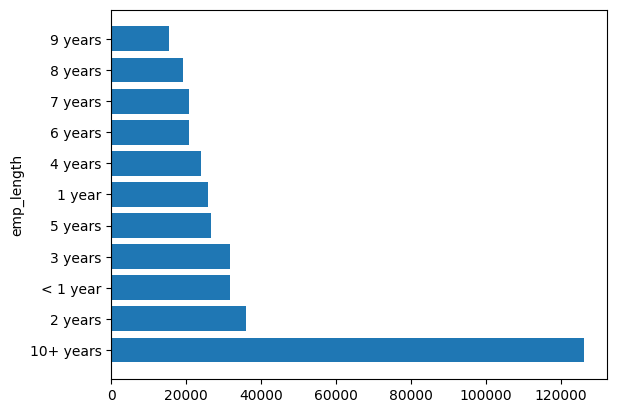

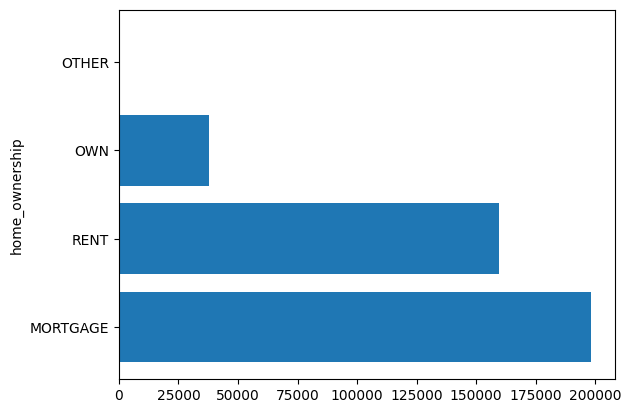

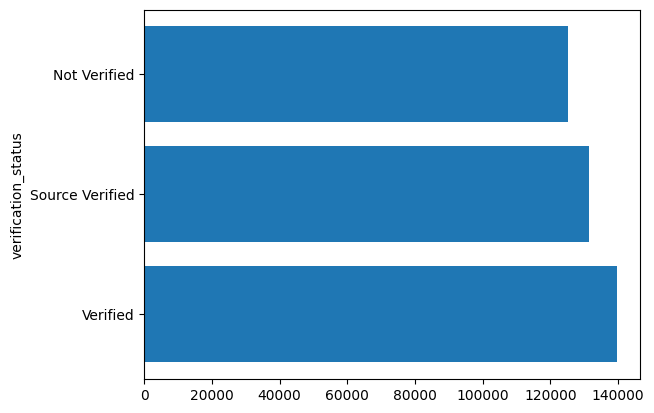

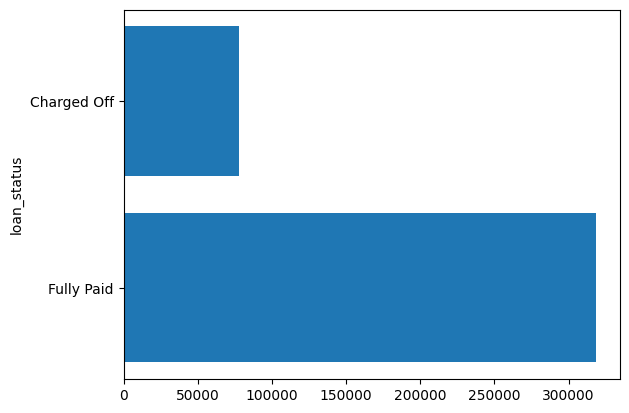

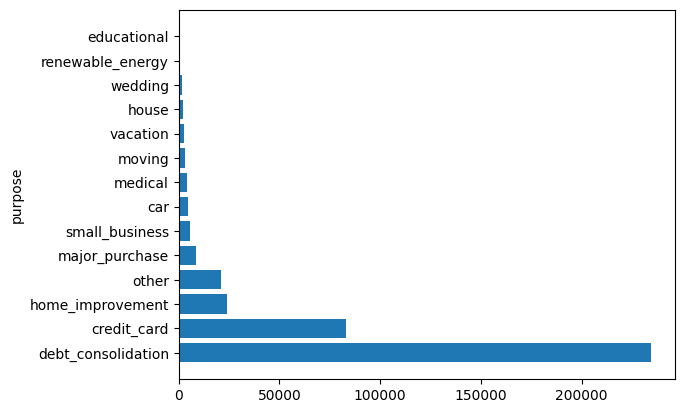

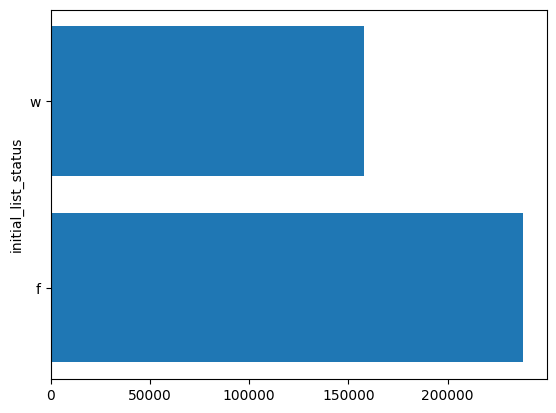

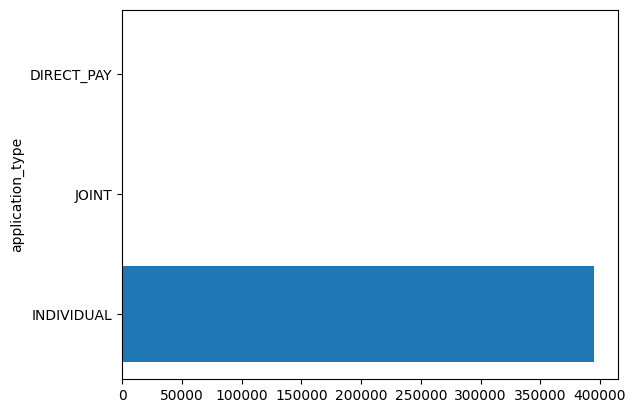

In [31]:
for col in cat_columns:
  if col not in ('emp_title', 'title'):
    plt.barh(data[col].value_counts().index, data[col].value_counts())
    plt.ylabel(col)
    plt.show()

1. We have majority of loan applications for the loan term of '36 months'. Which tells us that borrowers prefer lesser duration for the loan term.
2. The loan applications fall under the grades 'B' followed by 'C', and sub-grade 'B3' followed by 'B4'.
3. Majority of the borrowers have the employment duration more than 10 years.
4. Top home ownership options observed are 'Mortgage' followed by 'Rent'.
5. The no of loan applications among different borrower income verification status ('Not Verified', 'Source Verified' and 'Verified') is almost similar which is not good as it's important to verify the income before approving the loan to minimize the defaulters and the subsequent money loss.
6. Majority of the loan applications are fully paid which is good.
7. Top 2 purposes for which loan was taken are 'Debt Consolidation' and 'Credit Card'.
8. The initial list status for majority of loan applications is 'f' which means fractional.
9. Loan application type is mostly 'Individual'.

##Bivariate Analysis

### Target (Categorical) vs Features (Continuous)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


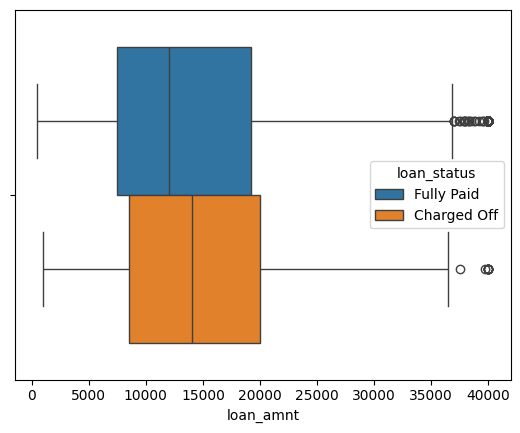

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


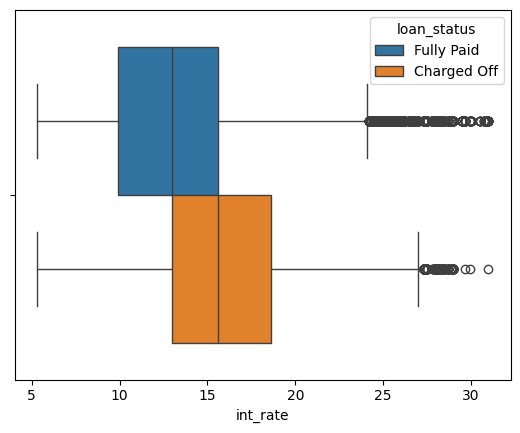

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


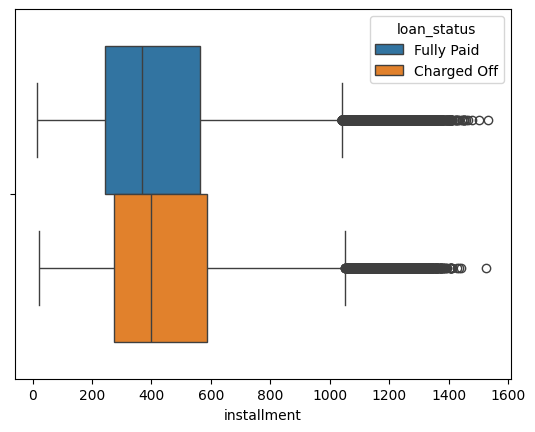

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


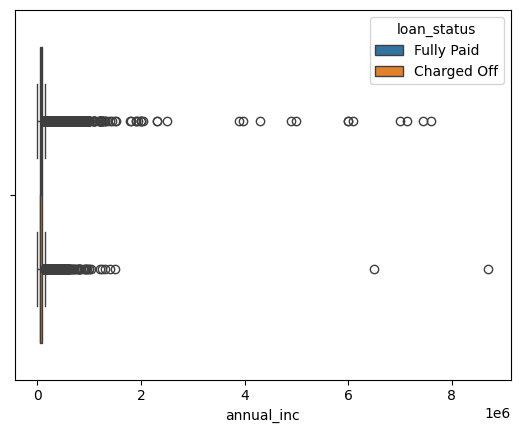

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


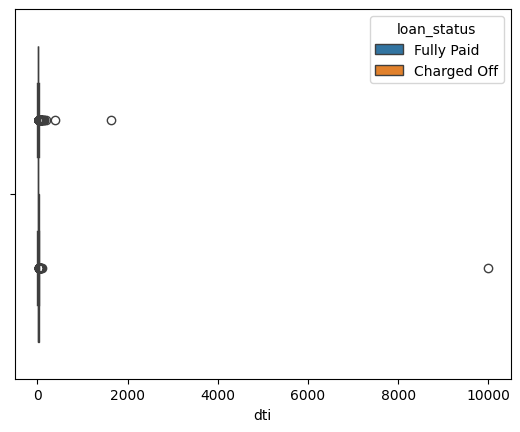

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


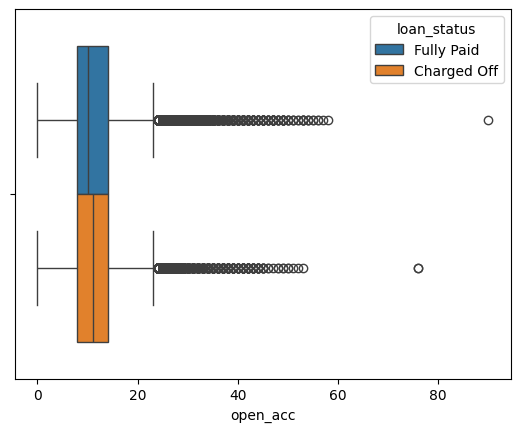

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


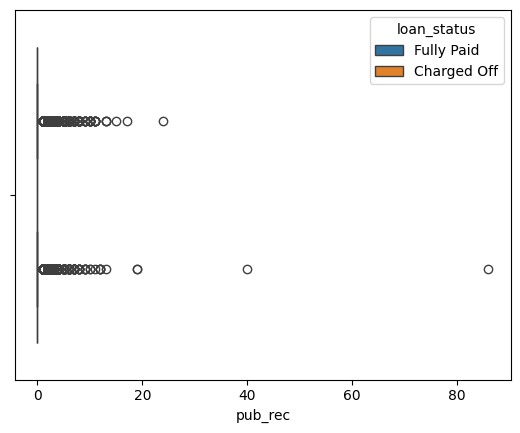

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


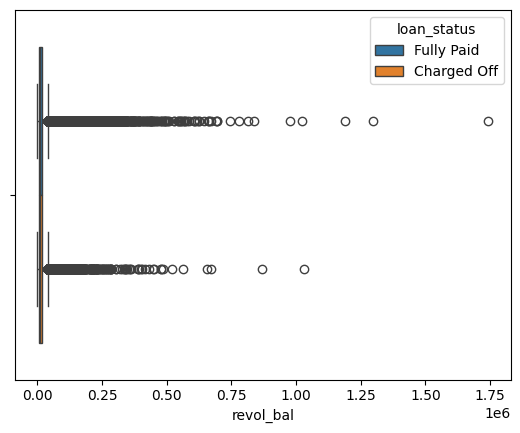

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


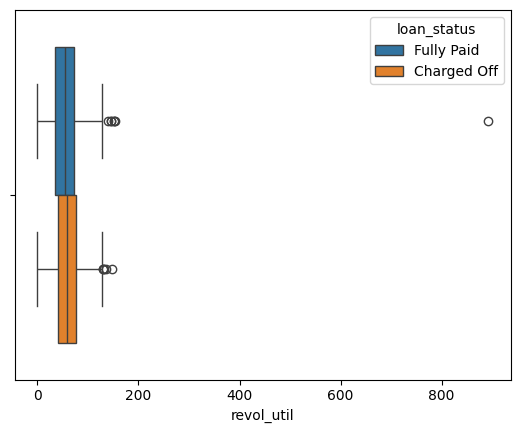

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


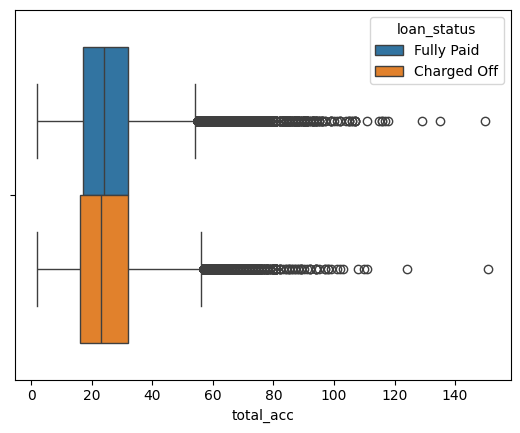

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


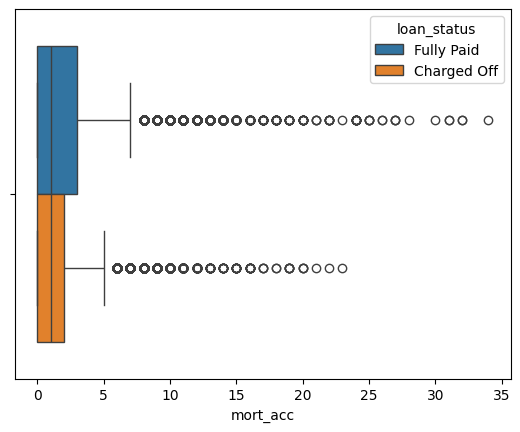

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


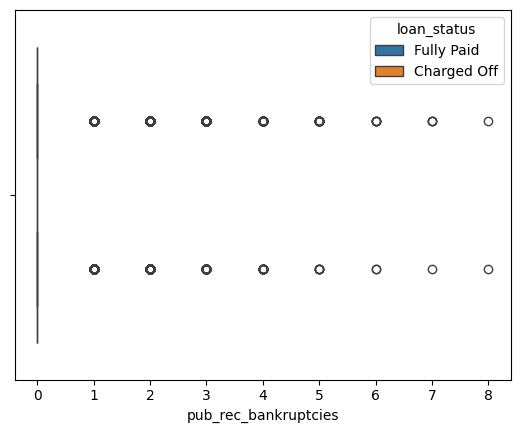

In [32]:
for col in data.columns:
  if data[col].dtype != 'object':
    sns.boxplot(data = data, x = col, hue = 'loan_status', orient = 'v')
    plt.show()

The median values for loan amount, installment, interest rate, no of active credit lines are slightly greater for the defaulters which makes sense as they couldn't pay off the loan.

### Target (Categorical) vs Features (Categorical)

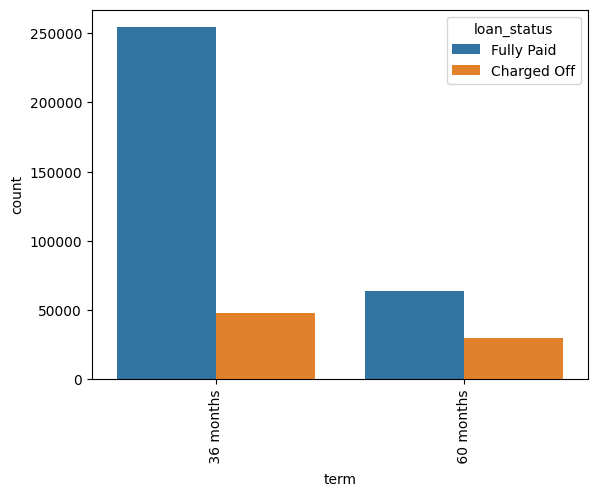

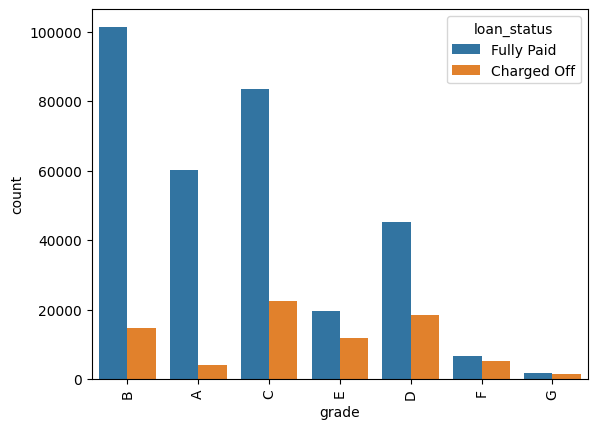

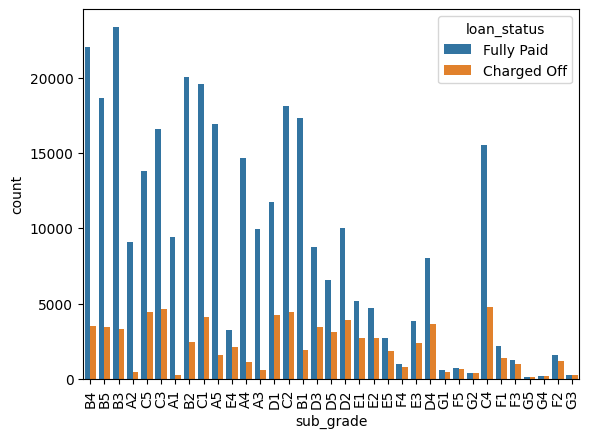

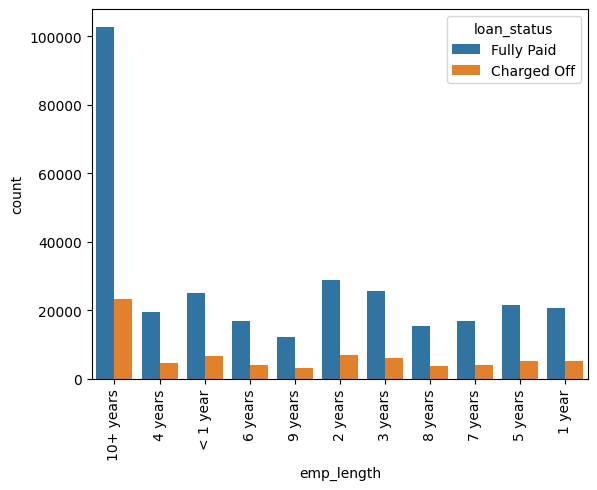

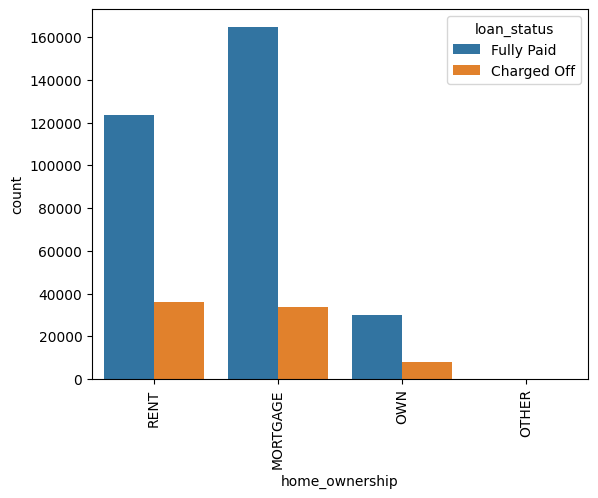

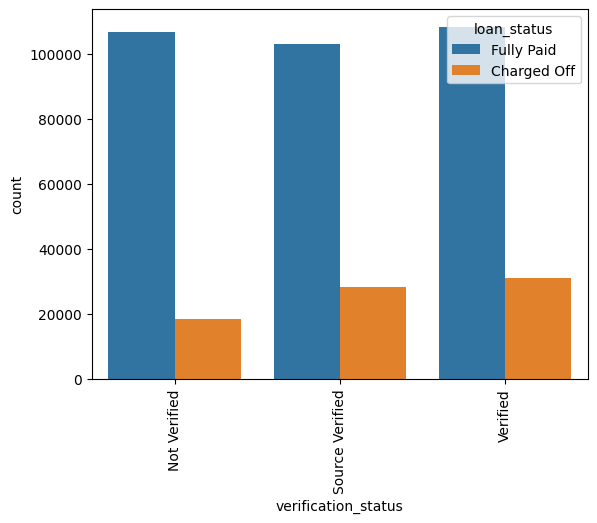

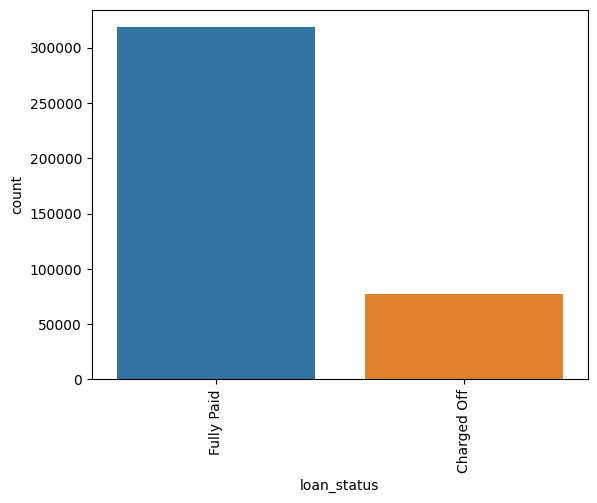

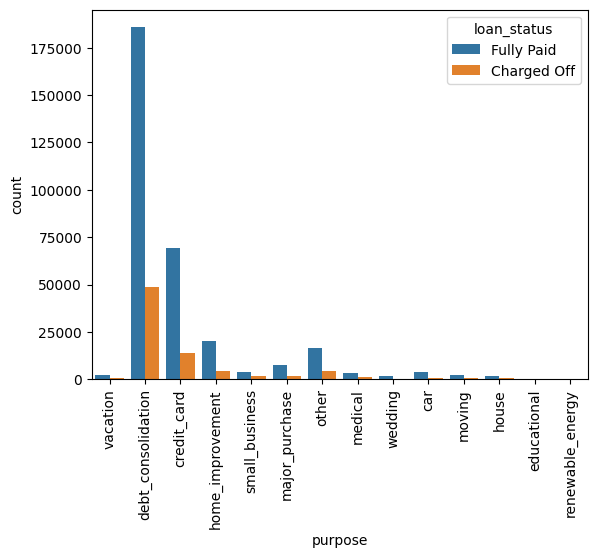

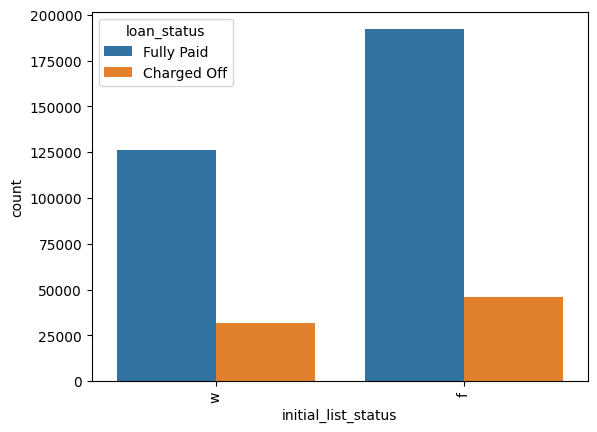

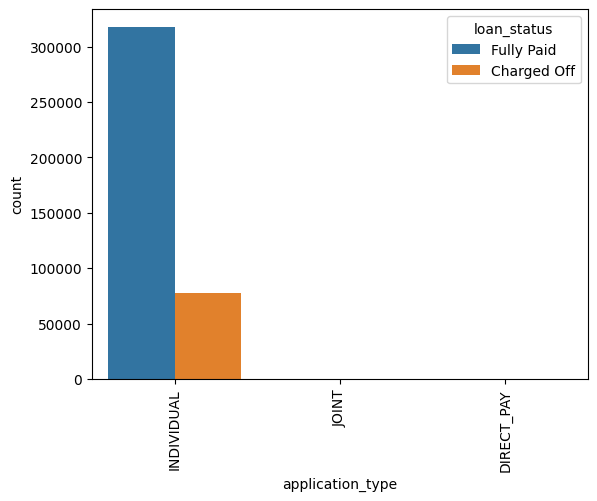

In [33]:
for col in cat_columns:
  if col not in ('emp_title', 'title'):
    sns.countplot(data = data, x = col, fill = 'True', hue = 'loan_status')
    plt.xticks(rotation = 90)
    plt.show()

1. For loan term '60 months', there is no huge difference between the no of defaulters and non-defaulters which means for greater duration the risk of defaulting is also high.
2. For the loan ratings 'A', 'B', 'C' and 'D', there's a huge difference between the no of defaulters and non-defaulters and no of non-defaulters is high which means more likely loan will be paid but for grades 'E', 'F' ad 'G', these nos are almost same that means high risk ratings.
3. Thus, we can say that grades 'A', 'B' and 'C' are low risk, grades 'D' and 'E' are moderate risk and 'F' and 'G' are high risk.
4. Similar pattern observed for the sub-grades with 1 being low risk in that grade and 5 being high risk.
5. So overall, A1 is lowest risk and G5 is the highest risk.
6. Among the borrowers with initial list status as 'w' i.e. whole is difference is lesser as compared to 'f' which means that more chance of defaulting when entire amount is approved.
7. Employee tenure, income verification status, purpose of loan, home ownership status and loan application type do not make much impact on defaulting.


### Features : Continuous vs Continuous

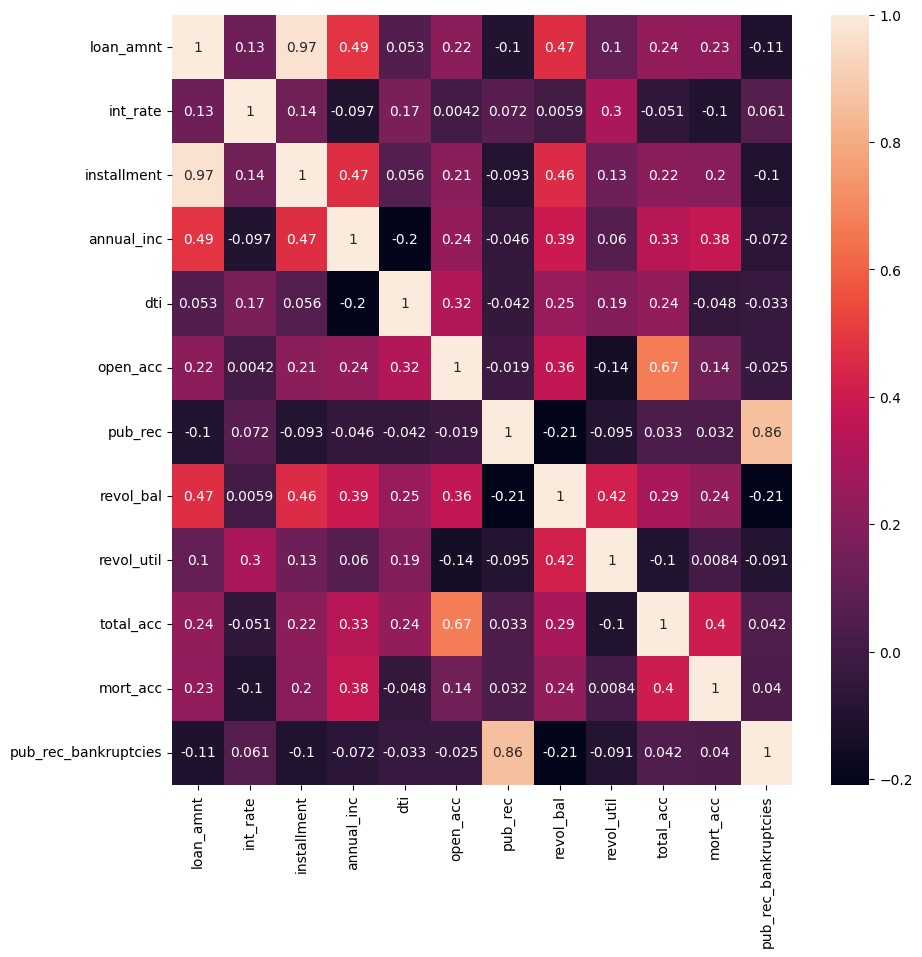

In [34]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[num_cols].corr(method = 'spearman'), annot = True, ax = ax)
plt.show()

1. The correlation coefficient is the highest for loan amount and installment features which is +0.97 which tells us that greater the loan amount, greater will be the monthly installment amount.
2. Also, the correlation is quite high (+0.86) between pub_rec (Negative records on borrower's public credit profile) and pub_rec_bankruptcies (Bankruptcy records for borrower) which is justified as the no of bankruptcies increases, the no of negative records would also increase.
3. Another pair having higher correlation (+0.67) is open_acc (Number of borrower's active credit lines) and
total_acc (Total number of borrower's credit lines)
4. There's negartive correlation (-0.1) between loan amount and pub_rec_bankruptcies or pub_rec as no of negative records or bankruptcies increases loan amount would decrease and it becomes quite risky to assume that borrower won't default.
5. Also, annual income and dti have negative correlation (-0.2) as monthly debt to monthly income ratio would decrease with increase in the income.


We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

So, we can drop either one of those columns.

In [35]:
data.drop(columns=['installment'], axis = 1, inplace = True)

#Data Preprocessing

## Duplicate value check

In [36]:
data.duplicated().sum()

0

There are no duplicate rows present in the dataset.

## Missing Value Detection

In [37]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [38]:
data.isna().sum() * 100.0/len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

There are missing values present in the columns:
1. emp_title
2. emp_length
3. title
4. revol_util
5. mort_acc
6. pub_rec_bankruptcies

## Missing Value Treatment

We will be using Simple Imputer to fill the missing values by using 'Most Frequent' strategy for the categorical variables such as emp_title, title and emp_length.

In [39]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['emp_title_filled', 'emp_length_filled', 'title_filled']] = imp.fit_transform(data[['emp_title', 'emp_length', 'title']])

Checking if missing values got filled correctly for categorical variables emp_title, title and emp_length.

In [40]:
data[['emp_title']].mode()

,emp_title
0,Teacher


In [41]:
data[['emp_length']].mode()

,emp_length
0,10+ years


In [42]:
data[['title']].mode()

,title
0,debt consolidation


In [43]:
data[data[['title']].isna().any(axis = 1)][['emp_title', 'emp_title_filled', 'emp_length', 'emp_length_filled', 'title', 'title_filled']]

,emp_title,emp_title_filled,emp_length,emp_length_filled,title,title_filled
555,Cocktail server,Cocktail server,< 1 year,< 1 year,NaN,debt consolidation
774,Teacher,Teacher,2 years,2 years,NaN,debt consolidation
883,Owner,Owner,6 years,6 years,NaN,debt consolidation
1016,Agent,Agent,1 year,1 year,NaN,debt consolidation
1204,Machine Operator,Machine Operator,8 years,8 years,NaN,debt consolidation
...,...,...,...,...,...,...
395261,Lab tech,Lab tech,9 years,9 years,NaN,debt consolidation
395306,general sales manager,general sales manager,8 years,8 years,NaN,debt consolidation
395355,Mortgage Loan Officer,Mortgage Loan Officer,< 1 year,< 1 year,NaN,debt consolidation
395633,STOCKER,STOCKER,10+ years,10+ years,NaN,debt consolidation


Using strategy 'Median' for the continuous variables like revol_util, mort_acc and pub_rec_bankruptcies.

In [44]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data[['mort_acc_filled', 'revol_util_filled', 'pub_rec_bankruptcies_filled']] = imp.fit_transform(data[['mort_acc', 'revol_util', 'pub_rec_bankruptcies']])

In [45]:
data[['mort_acc']].median()

mort_acc    1.0
dtype: float64

In [46]:
data[['revol_util']].median()

revol_util    54.8
dtype: float64

In [47]:
data[['pub_rec_bankruptcies']].median()

pub_rec_bankruptcies    0.0
dtype: float64

Drop original columns for these 6 that we filled and rename the _filled ones with the original names.

In [48]:
data.drop(['emp_title', 'emp_length', 'title', 'mort_acc', 'revol_util', 'pub_rec_bankruptcies'], axis =1, inplace = True)

In [49]:
data.isna().sum()

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
dti                            0
earliest_cr_line               0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
initial_list_status            0
application_type               0
address                        0
emp_title_filled               0
emp_length_filled              0
title_filled                   0
mort_acc_filled                0
revol_util_filled              0
pub_rec_bankruptcies_filled    0
dtype: int64

In [50]:
data = data.rename(columns = {'emp_title_filled': 'emp_title', 'emp_length_filled' : 'emp_length', 'title_filled' : 'title', 'mort_acc_filled' : 'mort_acc', 'revol_util_filled' : 'revol_util', 'pub_rec_bankruptcies_filled' : 'pub_rec_bankruptcies'})

## Outlier Detection and Treatment

Using IQR method to detect and treat the outliers.

In [51]:
#Calculating few more statistical measures such as 'Range', 'IQR', 'Lower Whisker' and 'Upper Whisker'

descriptive_stats = data.describe()
descriptive_stats = descriptive_stats.reindex(descriptive_stats.index.values.tolist()+['Range', 'IQR', 'Lower Whisker', 'Upper Whisker'])

for col in descriptive_stats.columns:
  descriptive_stats.loc['Range'][col] = descriptive_stats.loc['max'][col] - descriptive_stats.loc['min'][col]
  descriptive_stats.loc['IQR'][col] = descriptive_stats.loc['75%'][col] - descriptive_stats.loc['25%'][col]
  descriptive_stats.loc['Lower Whisker'][col] = descriptive_stats.loc['25%'][col] - (1.5 * descriptive_stats.loc['IQR'][col])
  descriptive_stats.loc['Upper Whisker'][col] = descriptive_stats.loc['75%'][col] + (1.5 * descriptive_stats.loc['IQR'][col])

descriptive_stats

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,revol_util,pub_rec_bankruptcies
count,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,25.414744,1.736308,53.792451,0.121483
std,8357.441341,4.472157,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,11.886991,2.056819,24.443685,0.355962
min,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.490000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,17.000000,0.000000,35.900000,0.000000
50%,12000.000000,13.330000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,24.000000,1.000000,54.800000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,32.000000,3.000000,72.900000,0.000000
max,40000.000000,30.990000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,151.000000,34.000000,892.300000,8.000000
Range,39500.000000,25.670000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,149.000000,34.000000,892.300000,8.000000
IQR,12000.000000,6.000000,4.500000e+04,11.700000,6.000000,0.000000,1.359500e+04,15.000000,3.000000,37.000000,0.000000


No of outliers present in the respective column

In [52]:
for col in descriptive_stats.columns:
  if col not in cat_columns:
    print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

loan_amnt : 191
int_rate : 3777
annual_inc : 16700
dti : 275
open_acc : 10307
pub_rec : 57758
revol_bal : 21259
total_acc : 8499
mort_acc : 6843
revol_util : 12
pub_rec_bankruptcies : 45115


In [53]:
for col in descriptive_stats.columns:
  if col not in cat_columns:
    print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count()/len(data))

loan_amnt : 0.0004822866954523647
int_rate : 0.009537156276039694
annual_inc : 0.042168522586672724
dti : 0.0006943918390020958
open_acc : 0.02602580612579855
pub_rec : 0.145842486680302
revol_bal : 0.05368027674671111
total_acc : 0.021460495417013864
mort_acc : 0.017278994015604877
revol_util : 3.0300734792818725e-05
pub_rec_bankruptcies : 0.11391813751483473


We can see that pub_rec and pub_rec_bankruptcies have highest % of outliers among others.

In [54]:
for col in data.columns:
    if (col not in cat_columns) and (col not in descriptive_stats.columns):
        print(col)

issue_d
earliest_cr_line
address


Clipping outliers to LW if < min and UW if > max.

In [55]:
for col in descriptive_stats.columns:
  if col not in cat_columns and col not in ('pub_rec', 'mort_acc', 'pub_rec_bankruptcies'):
    min = descriptive_stats.loc['Lower Whisker'][col]
    max = descriptive_stats.loc['Upper Whisker'][col]

    data.loc[data[col] < descriptive_stats.loc['Lower Whisker'][col], col] = min
    data.loc[data[col] > descriptive_stats.loc['Upper Whisker'][col], col] = max

Not dealing with the outliers present in pub_rec, mort_acc and pub_rec_bankruptcies as we are going to convert them to categorical columns by creating flags based on condition if > 1 then 1 else 0.

In [56]:
for col in descriptive_stats.columns:
  if col not in cat_columns:
    print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

loan_amnt : 0
int_rate : 0
annual_inc : 0
dti : 0
open_acc : 0
pub_rec : 57758
revol_bal : 0
total_acc : 0
mort_acc : 6843
revol_util : 0
pub_rec_bankruptcies : 45115


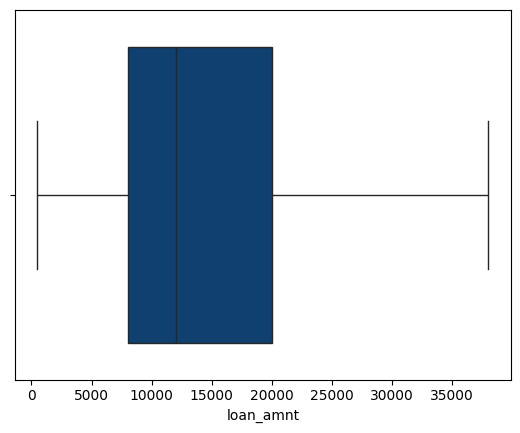

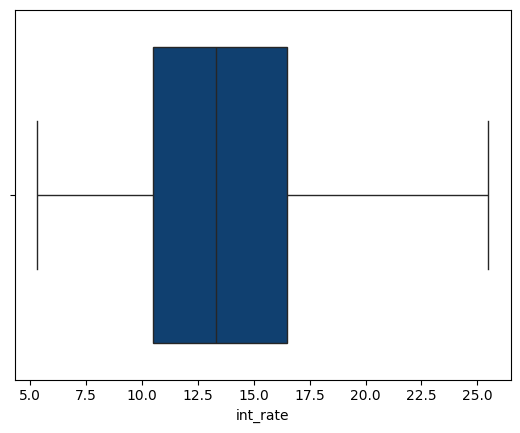

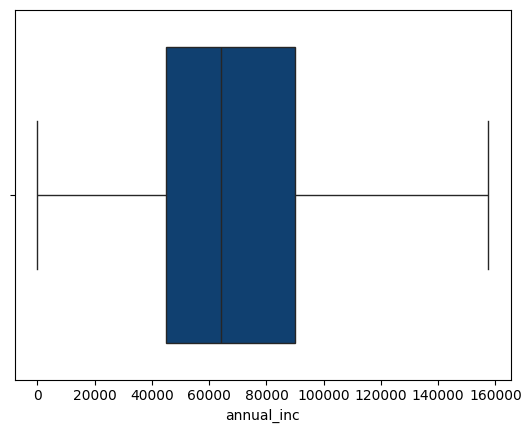

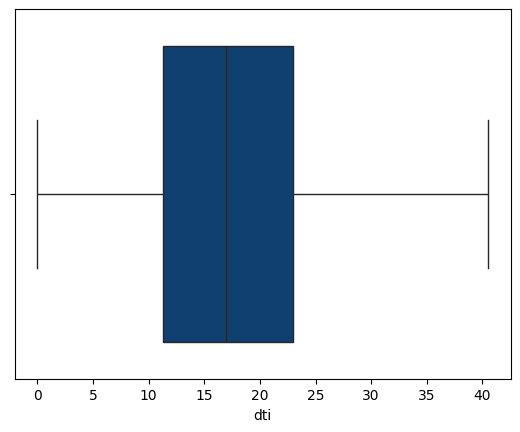

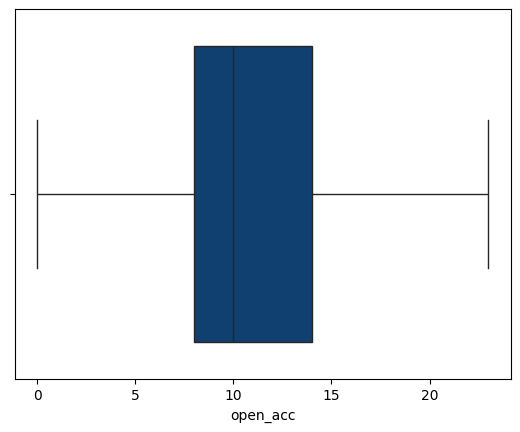

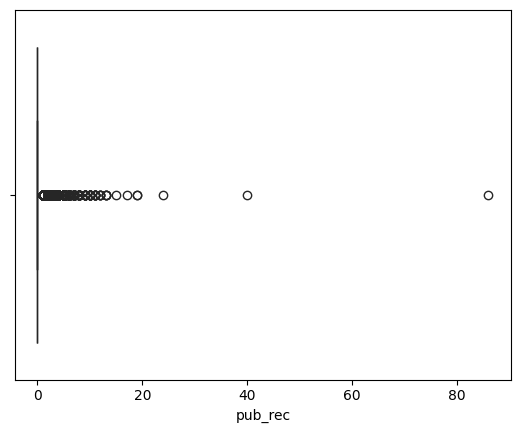

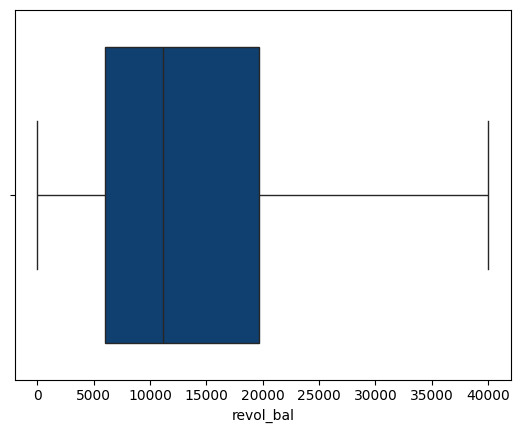

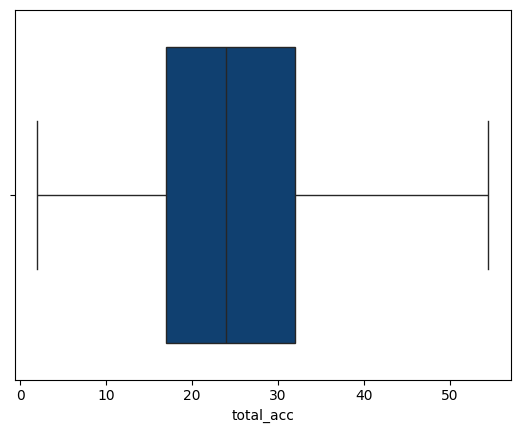

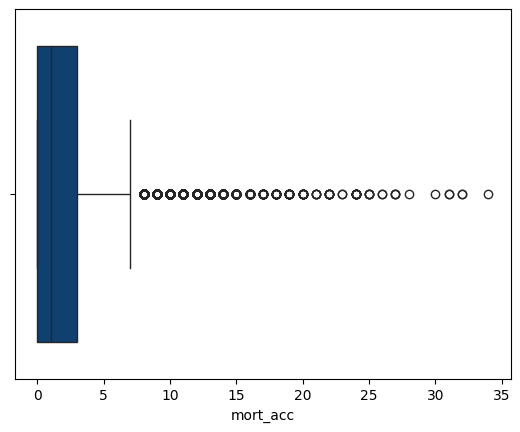

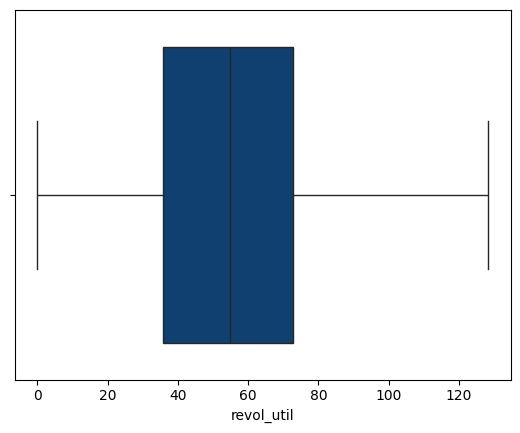

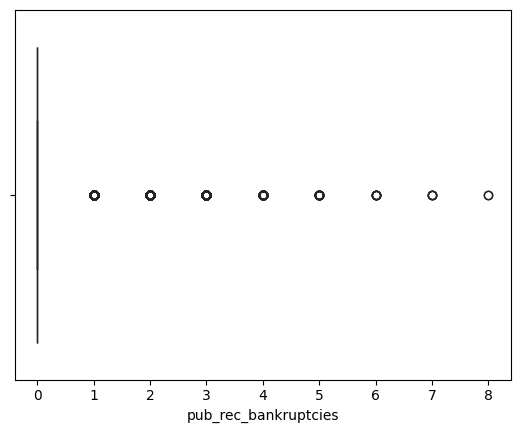

In [57]:
for col in data.columns:
  if data[col].dtype != 'object':
    sns.boxplot(data = data, x = col, palette = 'ocean')
    plt.show()

In [58]:
data[cat_columns]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,emp_title,title
0,36 months,B,B4,10+ years,RENT,Not Verified,Fully Paid,vacation,w,INDIVIDUAL,Marketing,vacation
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,Credit analyst,debt consolidation
2,36 months,B,B3,< 1 year,RENT,Source Verified,Fully Paid,credit_card,f,INDIVIDUAL,Statistician,credit card refinancing
3,36 months,A,A2,6 years,RENT,Not Verified,Fully Paid,credit_card,f,INDIVIDUAL,Client Advocate,credit card refinancing
4,60 months,C,C5,9 years,MORTGAGE,Verified,Charged Off,credit_card,f,INDIVIDUAL,Destiny Management Inc.,credit card refinance
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,2 years,RENT,Source Verified,Fully Paid,debt_consolidation,w,INDIVIDUAL,licensed bankere,debt consolidation
396026,36 months,C,C1,5 years,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,Agent,debt consolidation
396027,36 months,B,B1,10+ years,RENT,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,City Carrier,pay off credit cards
396028,60 months,C,C2,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,"Gracon Services, Inc",loanforpayoff


## Feature Engineering

### New Feature: is_defaulter

In [59]:
data.loc[data['loan_status'] == 'Charged Off', 'is_defaulter'] = 1
data.loc[data['loan_status'] == 'Fully Paid', 'is_defaulter'] = 0

In [60]:
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,emp_length,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,10+ years,vacation,0.0,41.8,0.0,0.0
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,4 years,debt consolidation,3.0,53.3,0.0,0.0
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,< 1 year,credit card refinancing,0.0,92.2,0.0,0.0
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,6 years,credit card refinancing,0.0,21.5,0.0,0.0
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,9 years,credit card refinance,1.0,69.8,0.0,1.0


In [61]:
data['is_defaulter'].value_counts()

is_defaulter
0.0    318357
1.0     77673
Name: count, dtype: int64

In [62]:
data['is_defaulter'].value_counts(normalize = True)

is_defaulter
0.0    0.803871
1.0    0.196129
Name: proportion, dtype: float64

We can see that 80.4% are non-defaulters and 19.6% are defaulters.

### Convert emp_length to numerical

In [63]:
data['emp_length'].value_counts()

emp_length
10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [64]:
data['emp_length_num'] = ((((data['emp_length'].str.replace('year', '')).str.replace('s', '').str.strip()).replace('10+', 10)).replace('< 1', 0)).astype('float')

In [65]:
data[['emp_length', 'emp_length_num']]

,emp_length,emp_length_num
0,10+ years,10.0
1,4 years,4.0
2,< 1 year,0.0
3,6 years,6.0
4,9 years,9.0
...,...,...
396025,2 years,2.0
396026,5 years,5.0
396027,10+ years,10.0
396028,10+ years,10.0


In [66]:
data['emp_length_num'].value_counts()

emp_length_num
10.0    144342
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

In [67]:
data = data.drop('emp_length', axis = 1)
data = data.rename(columns = {'emp_length_num' : 'emp_length'})
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter,emp_length
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,vacation,0.0,41.8,0.0,0.0,10.0
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,debt consolidation,3.0,53.3,0.0,0.0,4.0
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,credit card refinancing,0.0,92.2,0.0,0.0,0.0
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,credit card refinancing,0.0,21.5,0.0,0.0,6.0
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,credit card refinance,1.0,69.8,0.0,1.0,9.0


### Extract month and year from issue_d and earliest_cr_line

In [68]:
data[['issue_d_month', 'issue_d_year']] = data['issue_d'].str.split('-', expand = True)
data[['earliest_cr_line_month', 'earliest_cr_line_year']] = data['earliest_cr_line'].str.split('-', expand = True)

In [69]:
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter,emp_length,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,vacation,0.0,41.8,0.0,0.0,10.0,Jan,2015,Jun,1990
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,debt consolidation,3.0,53.3,0.0,0.0,4.0,Jan,2015,Jul,2004
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,credit card refinancing,0.0,92.2,0.0,0.0,0.0,Jan,2015,Aug,2007
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,credit card refinancing,0.0,21.5,0.0,0.0,6.0,Nov,2014,Sep,2006
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,credit card refinance,1.0,69.8,0.0,1.0,9.0,Apr,2013,Mar,1999


In [70]:
data['issue_d_month'].value_counts()

issue_d_month
Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: count, dtype: int64

In [71]:
data['issue_d_year'].value_counts()

issue_d_year
2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: count, dtype: int64

In [72]:
data['earliest_cr_line_month'].value_counts()

earliest_cr_line_month
Oct    38291
Sep    37673
Aug    37349
Nov    35583
Dec    33687
Jul    31972
Mar    31617
Jan    30694
Jun    30445
May    30445
Apr    29231
Feb    29043
Name: count, dtype: int64

In [73]:
data['earliest_cr_line_year'].value_counts()

earliest_cr_line_year
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

1. We can see that we have max loan applications from month of Oct and the year 2014.
2. First Credit line is mostly from year 2000.

In [74]:
data_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

data['issue_d_month_no'] = data['issue_d_month'].map(data_dict)
data['earliest_cr_line_month_no'] = data['earliest_cr_line_month'].map(data_dict)

In [75]:
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter,emp_length,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,issue_d_month_no,earliest_cr_line_month_no
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,vacation,0.0,41.8,0.0,0.0,10.0,Jan,2015,Jun,1990,1,6
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,debt consolidation,3.0,53.3,0.0,0.0,4.0,Jan,2015,Jul,2004,1,7
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,credit card refinancing,0.0,92.2,0.0,0.0,0.0,Jan,2015,Aug,2007,1,8
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,credit card refinancing,0.0,21.5,0.0,0.0,6.0,Nov,2014,Sep,2006,11,9
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,credit card refinance,1.0,69.8,0.0,1.0,9.0,Apr,2013,Mar,1999,4,3


In [76]:
data['issue_d_month_no'].value_counts()

issue_d_month_no
10    42130
7     39714
1     34682
11    34068
4     33223
8     32816
3     31919
5     31895
6     30140
12    29082
2     28742
9     27619
Name: count, dtype: int64

In [77]:
data['earliest_cr_line_month_no'].value_counts()

earliest_cr_line_month_no
10    38291
9     37673
8     37349
11    35583
12    33687
7     31972
3     31617
1     30694
6     30445
5     30445
4     29231
2     29043
Name: count, dtype: int64

### Extract state code and zip code from address

In [78]:
data[['address']]

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [79]:
data['address'].apply(lambda x: x[-8:-6:].strip())

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: address, Length: 396030, dtype: object

In [80]:
data['state'] = data['address'].apply(lambda x: x[-8:-6:].strip())

In [81]:
data['address'].apply(lambda x: x[-5::].strip())

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [82]:
data['zip_code'] = data['address'].apply(lambda x: x[-5::].strip())

In [83]:
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter,emp_length,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,issue_d_month_no,earliest_cr_line_month_no,state,zip_code
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,vacation,0.0,41.8,0.0,0.0,10.0,Jan,2015,Jun,1990,1,6,OK,22690
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,debt consolidation,3.0,53.3,0.0,0.0,4.0,Jan,2015,Jul,2004,1,7,SD,05113
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,credit card refinancing,0.0,92.2,0.0,0.0,0.0,Jan,2015,Aug,2007,1,8,WV,05113
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,credit card refinancing,0.0,21.5,0.0,0.0,6.0,Nov,2014,Sep,2006,11,9,MA,00813
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,credit card refinance,1.0,69.8,0.0,1.0,9.0,Apr,2013,Mar,1999,4,3,VA,11650


### Distribution of loan status among state code and zip code

In [84]:
data['state'].value_counts()

state
AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
ID     6958
IN     6958
KS     6945
WV     6944
RI     6940
MO     6939
IL     6934
WY     6933
NE     6927
HI     6927
IA     6926
FL     6921
AZ     6918
CO     6914
OK     6911
CT     6904
MN     6904
NC     6901
OR     6898
CA     6898
AL     6898
MD     6896
WA     6895
UT     6887
SD     6887
MT     6883
DE     6874
TN     6869
ND     6858
MI     6854
DC     6842
NM     6842
PA     6825
NH     6818
KY     6800
Name: count, dtype: int64

In [85]:
data['zip_code'].value_counts()

zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [86]:
data['zip_code'].nunique()

10

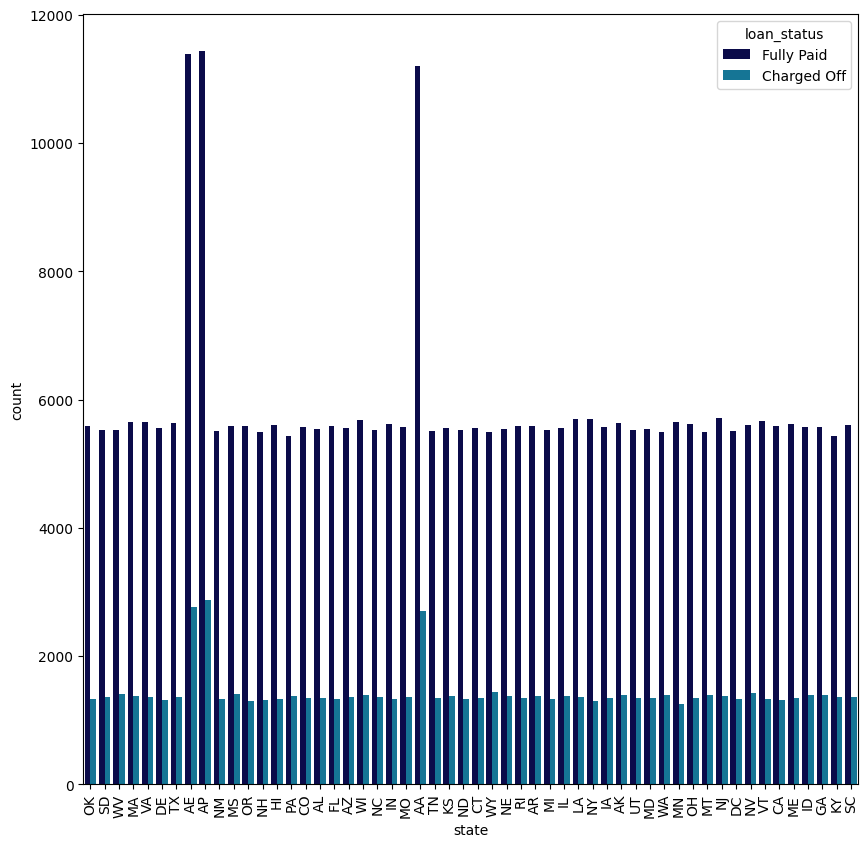

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data = data, x = 'state', hue = 'loan_status', palette = 'ocean', ax = ax)
plt.xticks(rotation = 90)
plt.show()

1. State codes 'AP', 'AE' and 'AA' are the top 3 states from which loan applications have been received (in same order).
2. For all other states, it's almost similar.
3. Thus, distribution is different across states.

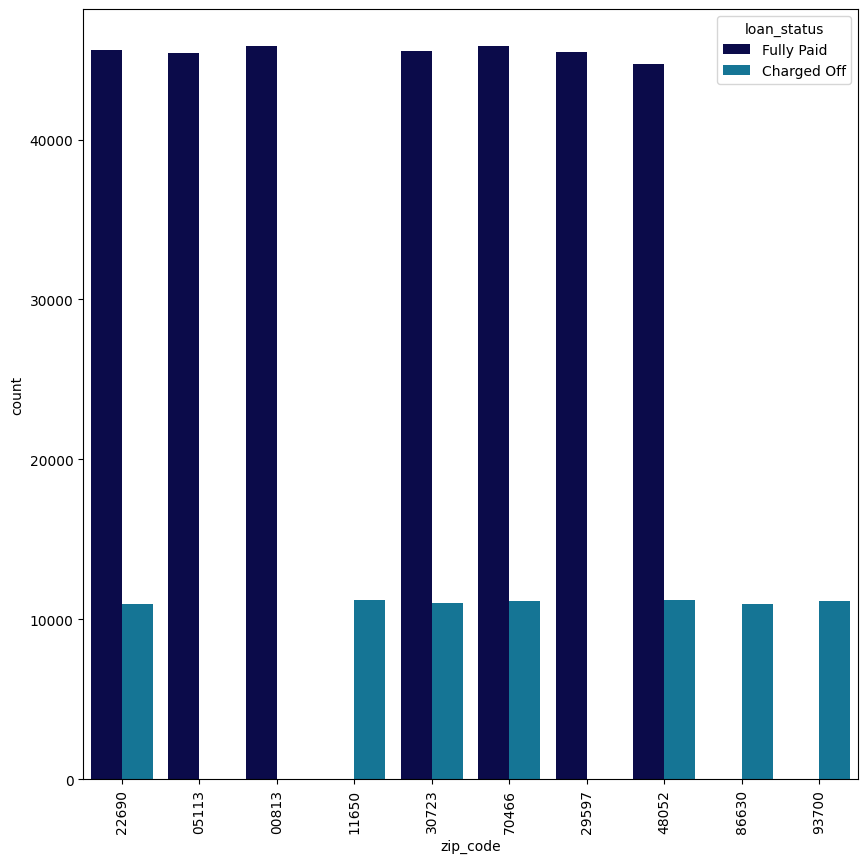

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data = data, x = 'zip_code', hue = 'loan_status', palette = 'ocean', ax = ax)
plt.xticks(rotation = 90)
plt.show()

1. We can see that the distribution of borrowers w.r.t. their loan status is significantly different as per the zip codes.
2. Zip codes: 05113, 00813, 29597 are having only non-defaulters where as the zip codes: 11650, 86630, 93700 are having only defaulters.

### Creation of flags for Pub_rec, Mort_acc and Pub_rec_bankruptcies

In [89]:
data['is_pub_rec'] = np.where(data['pub_rec'] > 1.0, 1, 0)

In [90]:
data['is_mort_acc'] = np.where(data['mort_acc'] > 1.0, 1, 0)

In [91]:
data['is_pub_rec_bankruptcies'] = np.where(data['pub_rec_bankruptcies'] > 1.0, 1, 0)

In [92]:
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,emp_title,title,mort_acc,revol_util,pub_rec_bankruptcies,is_defaulter,emp_length,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,issue_d_month_no,earliest_cr_line_month_no,state,zip_code,is_pub_rec,is_mort_acc,is_pub_rec_bankruptcies
0,10000.0,36 months,11.44,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Marketing,vacation,0.0,41.8,0.0,0.0,10.0,Jan,2015,Jun,1990,1,6,OK,22690,0,0,0
1,8000.0,36 months,11.99,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Credit analyst,debt consolidation,3.0,53.3,0.0,0.0,4.0,Jan,2015,Jul,2004,1,7,SD,05113,0,1,0
2,15600.0,36 months,10.49,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Statistician,credit card refinancing,0.0,92.2,0.0,0.0,0.0,Jan,2015,Aug,2007,1,8,WV,05113,0,0,0
3,7200.0,36 months,6.49,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813",Client Advocate,credit card refinancing,0.0,21.5,0.0,0.0,6.0,Nov,2014,Sep,2006,11,9,MA,00813,0,0,0
4,24375.0,60 months,17.27,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650",Destiny Management Inc.,credit card refinance,1.0,69.8,0.0,1.0,9.0,Apr,2013,Mar,1999,4,3,VA,11650,0,0,0


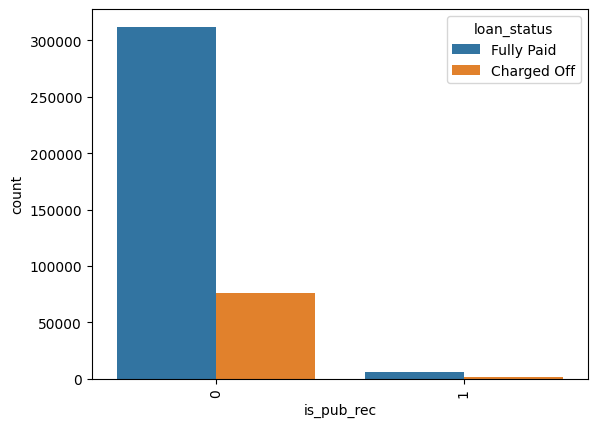

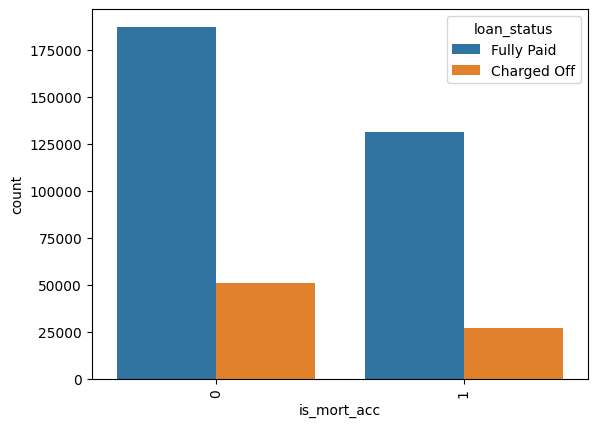

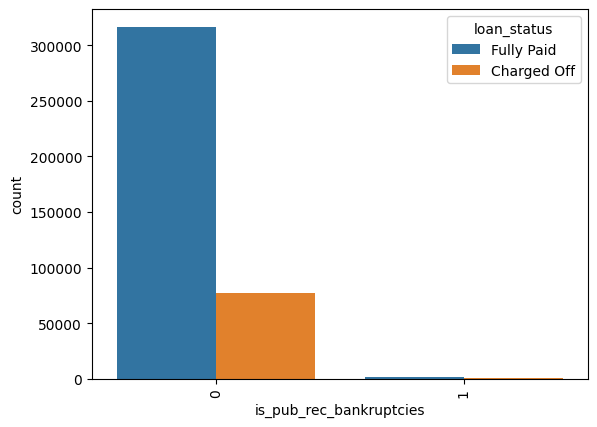

In [93]:
cols = ['is_pub_rec', 'is_mort_acc', 'is_pub_rec_bankruptcies']

for col in cols:
  sns.countplot(data = data, x = col, fill = 'True', hue = 'loan_status')
  plt.xticks(rotation = 90)
  plt.show()

We can see that when either negative records on borrower's public credit profile are present or bankruptcy records are available for borrower, then there are more chances of defaulting.

## Data preparation for modeling

In [734]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'address', 'emp_title', 'title', 'mort_acc', 'revol_util',
       'pub_rec_bankruptcies', 'is_defaulter', 'emp_length', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year',
       'issue_d_month_no', 'earliest_cr_line_month_no', 'state', 'zip_code',
       'is_pub_rec', 'is_mort_acc', 'is_pub_rec_bankruptcies'],
      dtype='object')

In [735]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  396030 non-null  float64
 1   term                       396030 non-null  object 
 2   int_rate                   396030 non-null  float64
 3   grade                      396030 non-null  object 
 4   sub_grade                  396030 non-null  object 
 5   home_ownership             396030 non-null  object 
 6   annual_inc                 396030 non-null  float64
 7   verification_status        396030 non-null  object 
 8   issue_d                    396030 non-null  object 
 9   loan_status                396030 non-null  object 
 10  purpose                    396030 non-null  object 
 11  dti                        396030 non-null  float64
 12  earliest_cr_line           396030 non-null  object 
 13  open_acc                   39

Dropping extra unnecessary columns

In [736]:
data.drop(columns = ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'earliest_cr_line_month', 'issue_d', 'loan_status', 'earliest_cr_line', 'address' ], axis = 1, inplace = True)

In [737]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  396030 non-null  float64
 1   term                       396030 non-null  object 
 2   int_rate                   396030 non-null  float64
 3   grade                      396030 non-null  object 
 4   sub_grade                  396030 non-null  object 
 5   home_ownership             396030 non-null  object 
 6   annual_inc                 396030 non-null  float64
 7   verification_status        396030 non-null  object 
 8   purpose                    396030 non-null  object 
 9   dti                        396030 non-null  float64
 10  open_acc                   396030 non-null  float64
 11  revol_bal                  396030 non-null  float64
 12  total_acc                  396030 non-null  float64
 13  initial_list_status        39

In [738]:
data = data.rename(columns = {'is_pub_rec' : 'pub_rec', 'is_mort_acc' : 'mort_acc', 'is_pub_rec_bankruptcies' : 'pub_rec_bankruptcies'})

In [739]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  396030 non-null  float64
 1   term                       396030 non-null  object 
 2   int_rate                   396030 non-null  float64
 3   grade                      396030 non-null  object 
 4   sub_grade                  396030 non-null  object 
 5   home_ownership             396030 non-null  object 
 6   annual_inc                 396030 non-null  float64
 7   verification_status        396030 non-null  object 
 8   purpose                    396030 non-null  object 
 9   dti                        396030 non-null  float64
 10  open_acc                   396030 non-null  float64
 11  revol_bal                  396030 non-null  float64
 12  total_acc                  396030 non-null  float64
 13  initial_list_status        39

Converting necessary columns to category.

In [740]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = data[col].astype('category')

In [741]:
for col in data.columns:
  if data[col].dtype == 'category':
    print(col)

term
grade
sub_grade
home_ownership
verification_status
purpose
initial_list_status
application_type
emp_title
title
issue_d_year
earliest_cr_line_year
state
zip_code


In [742]:
for col in data.columns:
  if data[col].dtype != 'category':
    print(col)

loan_amnt
int_rate
annual_inc
dti
open_acc
revol_bal
total_acc
revol_util
is_defaulter
emp_length
issue_d_month_no
earliest_cr_line_month_no
pub_rec
mort_acc
pub_rec_bankruptcies


In [743]:
columns_to_cat = ['emp_length','issue_d_month_no','earliest_cr_line_month_no','pub_rec','mort_acc','pub_rec_bankruptcies']

In [744]:
for col in columns_to_cat:
  data[col] = data[col].astype('category')

In [745]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_amnt                  396030 non-null  float64 
 1   term                       396030 non-null  category
 2   int_rate                   396030 non-null  float64 
 3   grade                      396030 non-null  category
 4   sub_grade                  396030 non-null  category
 5   home_ownership             396030 non-null  category
 6   annual_inc                 396030 non-null  float64 
 7   verification_status        396030 non-null  category
 8   purpose                    396030 non-null  category
 9   dti                        396030 non-null  float64 
 10  open_acc                   396030 non-null  float64 
 11  revol_bal                  396030 non-null  float64 
 12  total_acc                  396030 non-null  float64 
 13  initial_list_s

In [747]:
target_encoding_cols = ['term', 'grade', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'sub_grade', 'purpose', 'emp_title', 'title', 'state', 'issue_d_month_no', 'earliest_cr_line_month_no', 'issue_d_year', 'earliest_cr_line_year', 'zip_code', 'pub_rec','mort_acc','pub_rec_bankruptcies', 'emp_length']

for col in data.columns:
  if data[col].dtype == 'category' and col not in target_encoding_cols:
    print(col)

In [748]:
for col in data.columns:
  if data[col].dtype != 'category' and col in target_encoding_cols:
    print(col)

### Target Encoding

We will apply target encoding for all the category columns as one hot encoding for columns with 2 categories might add multi-collinearity. So, it will replace category with mean value of target column i.e. is_defaulter with that category value.

In [749]:
target_encoder = ce.TargetEncoder()

In [751]:
data[['term', 'grade', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'sub_grade', 'purpose', 'emp_title', 'title', 'state', 'issue_d_month_no', 'earliest_cr_line_month_no', 'issue_d_year', 'earliest_cr_line_year', 'zip_code', 'pub_rec','mort_acc','pub_rec_bankruptcies', 'emp_length']] = target_encoder.fit_transform(data[['term', 'grade', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'sub_grade', 'purpose', 'emp_title', 'title', 'state', 'issue_d_month_no', 'earliest_cr_line_month_no', 'issue_d_year', 'earliest_cr_line_year', 'zip_code', 'pub_rec','mort_acc','pub_rec_bankruptcies', 'emp_length']], data['is_defaulter'])

data

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,revol_bal,total_acc,initial_list_status,application_type,emp_title,title,revol_util,is_defaulter,emp_length,issue_d_year,earliest_cr_line_year,issue_d_month_no,earliest_cr_line_month_no,state,zip_code,pub_rec,mort_acc,pub_rec_bankruptcies
0,10000.0,0.157746,11.44,0.125730,0.138393,0.226622,117000.0,0.146360,0.189233,26.24,16.0,36369.0,25.0,0.200755,0.196087,0.247140,0.204180,41.8,0.0,0.195737,0.249013,0.162140,0.198806,0.194055,0.192013,0.193784,0.195376,0.213578,0.195921
1,8000.0,0.157746,11.99,0.125730,0.155037,0.169561,65000.0,0.146360,0.207414,22.05,17.0,20131.0,27.0,0.193060,0.196087,0.217322,0.223438,53.3,0.0,0.192385,0.249013,0.217127,0.198806,0.198142,0.197038,0.000000,0.195376,0.169854,0.195921
2,15600.0,0.157746,10.49,0.125730,0.123354,0.226622,43057.0,0.214743,0.167118,12.79,13.0,11987.0,26.0,0.193060,0.196087,0.191993,0.192329,92.2,0.0,0.206872,0.249013,0.231238,0.198806,0.197381,0.204061,0.000000,0.195376,0.213578,0.195921
3,7200.0,0.157746,6.49,0.062879,0.048186,0.226622,54000.0,0.146360,0.167118,2.60,6.0,5472.0,13.0,0.193060,0.196087,0.170611,0.192329,21.5,0.0,0.189194,0.231110,0.224618,0.186421,0.194410,0.196098,0.000000,0.195376,0.213578,0.195921
4,24375.0,0.319415,17.27,0.211809,0.245067,0.169561,55000.0,0.223211,0.167118,33.95,13.0,24584.0,43.0,0.193060,0.196087,0.300719,0.115175,69.8,1.0,0.200470,0.157400,0.190669,0.205520,0.200557,0.195101,1.000000,0.195376,0.213578,0.195921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,0.319415,10.99,0.125730,0.138393,0.226622,40000.0,0.214743,0.207414,15.63,6.0,1990.0,23.0,0.200755,0.196087,0.170611,0.223438,34.3,0.0,0.193262,0.249013,0.217127,0.197555,0.195543,0.195557,0.194903,0.195376,0.213578,0.195921
396026,21000.0,0.157746,12.29,0.211809,0.173696,0.169561,110000.0,0.214743,0.207414,21.45,6.0,40012.5,8.0,0.193060,0.196087,0.220430,0.223438,95.7,0.0,0.192187,0.249013,0.224618,0.201482,0.195503,0.193690,0.000000,0.195376,0.213578,0.195921
396027,5000.0,0.157746,9.99,0.125730,0.098582,0.226622,56500.0,0.223211,0.207414,17.56,15.0,32704.0,23.0,0.193060,0.196087,0.268003,0.159858,66.9,0.0,0.195737,0.157400,0.188316,0.197555,0.200557,0.186465,0.195630,0.195376,0.213578,0.195921
396028,21000.0,0.319415,15.31,0.211809,0.197520,0.169561,64000.0,0.223211,0.207414,15.88,9.0,15704.0,20.0,0.193060,0.196087,0.170611,0.170611,53.8,0.0,0.195737,0.164798,0.162140,0.188810,0.195543,0.193469,0.000000,0.195376,0.169854,0.195921


#Model Building

## Split training and testing data

In [753]:
data['is_defaulter']

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: is_defaulter, Length: 396030, dtype: float64

In [754]:
X = data.drop('is_defaulter', axis = 1)
y = data['is_defaulter']

In [755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [756]:
X_train.shape

(277221, 28)

In [757]:
X_test.shape

(118809, 28)

In [758]:
y_train.shape

(277221,)

In [759]:
y_test.shape

(118809,)

In [760]:
X_train.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,revol_bal,total_acc,initial_list_status,application_type,emp_title,title,revol_util,emp_length,issue_d_year,earliest_cr_line_year,issue_d_month_no,earliest_cr_line_month_no,state,zip_code,pub_rec,mort_acc,pub_rec_bankruptcies
3412,10000.0,0.319415,11.99,0.125730,0.155037,0.169561,31000.0,0.146360,0.207414,27.78,23.0,2318.0,54.5,0.200755,0.196087,0.170276,0.223438,6.9,0.192187,0.231110,0.173127,0.173406,0.195901,0.201913,0.000000,0.195376,0.169854,0.195921
134032,12425.0,0.319415,25.49,0.427880,0.486757,0.226622,65500.0,0.223211,0.207414,7.86,4.0,697.0,15.0,0.200755,0.196087,0.221311,0.223438,11.6,0.195737,0.249013,0.176592,0.184474,0.199891,0.193458,0.200154,0.195376,0.213578,0.195921
19526,8000.0,0.157746,9.17,0.125730,0.098582,0.169561,62000.0,0.146360,0.167118,22.67,17.0,35270.0,47.0,0.193060,0.196087,0.224064,0.192329,77.2,0.195737,0.231110,0.182917,0.208120,0.195543,0.202175,0.000000,0.195376,0.169854,0.195921
61015,15000.0,0.157746,7.62,0.062879,0.058056,0.169561,45000.0,0.214743,0.207414,19.78,9.0,13026.0,33.0,0.200755,0.196087,0.192777,0.143403,22.1,0.195737,0.231110,0.182917,0.198806,0.199891,0.193141,0.200154,0.195376,0.169854,0.195921
2896,15000.0,0.157746,13.99,0.211809,0.235355,0.206803,35000.0,0.214743,0.207414,39.71,13.0,8781.0,44.0,0.200755,0.196087,0.170611,0.223438,49.3,0.195737,0.249013,0.192331,0.198534,0.200557,0.202472,0.000000,0.195376,0.213578,0.195921


In [761]:
y_train.head()

3412      0.0
134032    0.0
19526     0.0
61015     0.0
2896      0.0
Name: is_defaulter, dtype: float64

In [762]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277221 entries, 3412 to 121958
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  277221 non-null  float64
 1   term                       277221 non-null  float64
 2   int_rate                   277221 non-null  float64
 3   grade                      277221 non-null  float64
 4   sub_grade                  277221 non-null  float64
 5   home_ownership             277221 non-null  float64
 6   annual_inc                 277221 non-null  float64
 7   verification_status        277221 non-null  float64
 8   purpose                    277221 non-null  float64
 9   dti                        277221 non-null  float64
 10  open_acc                   277221 non-null  float64
 11  revol_bal                  277221 non-null  float64
 12  total_acc                  277221 non-null  float64
 13  initial_list_status        2772

In [763]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 277221 entries, 3412 to 121958
Series name: is_defaulter
Non-Null Count   Dtype  
--------------   -----  
277221 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [764]:
y_train

3412      0.0
134032    0.0
19526     0.0
61015     0.0
2896      0.0
         ... 
259178    0.0
365838    1.0
131932    0.0
146867    0.0
121958    1.0
Name: is_defaulter, Length: 277221, dtype: float64

### Feature Scaling

Using Standard Scaler as scaling method and note that fit_transform should be done only on training data.

In [765]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression using sklearn

In [767]:
model = LogisticRegression(max_iter=1000)

In [768]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [769]:
pred_y_train = model.predict(X_train)
pred_y_test = model.predict(X_test)

In [770]:
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.920


### Model coef and intercept

In [771]:
coefs = model.coef_.reshape(-1,1)
lst = list(X.columns)

In [772]:
#w1, w2...w27
coefs

array([[ 1.38398980e-01],
       [ 2.29202670e-01],
       [ 1.77839868e-01],
       [-2.33215218e-02],
       [ 2.11443813e-01],
       [ 1.46470923e-01],
       [-6.77768341e-03],
       [ 3.35492924e-02],
       [-1.97819527e-01],
       [ 1.47518410e-01],
       [ 1.73290930e-01],
       [-7.15317429e-02],
       [-7.00802116e-02],
       [-1.17981489e-01],
       [ 4.84440015e-03],
       [ 1.31665904e+00],
       [ 4.92844290e-01],
       [ 2.04307342e-01],
       [ 2.57313199e-02],
       [ 5.44637475e-02],
       [-4.45658436e-03],
       [ 2.77710460e-02],
       [-4.90437871e-03],
       [ 3.15780681e-02],
       [ 9.28179390e+00],
       [-1.16193516e-02],
       [ 8.29470126e-02],
       [-4.73083570e-03]])

In [773]:
for i in range(len(lst)):
  print('Column: ', lst[i], ' Coef: ', coefs[i])

Column:  loan_amnt  Coef:  [0.13839898]
Column:  term  Coef:  [0.22920267]
Column:  int_rate  Coef:  [0.17783987]
Column:  grade  Coef:  [-0.02332152]
Column:  sub_grade  Coef:  [0.21144381]
Column:  home_ownership  Coef:  [0.14647092]
Column:  annual_inc  Coef:  [-0.00677768]
Column:  verification_status  Coef:  [0.03354929]
Column:  purpose  Coef:  [-0.19781953]
Column:  dti  Coef:  [0.14751841]
Column:  open_acc  Coef:  [0.17329093]
Column:  revol_bal  Coef:  [-0.07153174]
Column:  total_acc  Coef:  [-0.07008021]
Column:  initial_list_status  Coef:  [-0.11798149]
Column:  application_type  Coef:  [0.0048444]
Column:  emp_title  Coef:  [1.31665904]
Column:  title  Coef:  [0.49284429]
Column:  revol_util  Coef:  [0.20430734]
Column:  emp_length  Coef:  [0.02573132]
Column:  issue_d_year  Coef:  [0.05446375]
Column:  earliest_cr_line_year  Coef:  [-0.00445658]
Column:  issue_d_month_no  Coef:  [0.02777105]
Column:  earliest_cr_line_month_no  Coef:  [-0.00490438]
Column:  state  Coef:  

In [776]:
coef_df = pd.DataFrame()
coef_df['column_name'] = lst
coef_df['coef_value'] = coefs
coef_df.sort_values(by = 'coef_value', ascending = False)

,column_name,coef_value
24,zip_code,9.281794
15,emp_title,1.316659
16,title,0.492844
1,term,0.229203
4,sub_grade,0.211444
17,revol_util,0.204307
2,int_rate,0.177840
10,open_acc,0.173291
9,dti,0.147518
5,home_ownership,0.146471


We can see that zip_code and emp_title are having top 2 highest weights, which is quite surprising.

In [777]:
#w0
model.intercept_

array([-2.11207663])

In [778]:
model.score(X_test, y_test)

0.9204689880396266

### Metric evaluation

#### Confusion Matrix

In [780]:
conf_matrix = confusion_matrix(y_test, pred_y_test)
conf_matrix

array([[92694,  2745],
       [ 6704, 16666]])

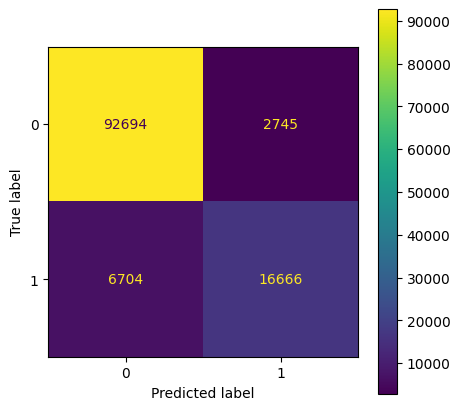

In [781]:
fig, ax = plt.subplots(figsize= (5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

#### Accuracy

In [782]:
accuracy = np.diag(conf_matrix).sum() / conf_matrix.sum()
accuracy

0.9204689880396266

In [783]:
accuracy_score(y_test, pred_y_test)

0.9204689880396266

#### Precision

In [784]:
precision_score(y_test, pred_y_test)

0.8585853382102931

#### Recall

In [785]:
recall_score(y_test, pred_y_test)

0.7131364997860505

Precision is higher than recall which means that FN is higher than FP.

#### F1 Score

Testing F1-score

In [786]:
f1_score(y_test, pred_y_test)

0.7791309226058298

Training F1-score

In [787]:
f1_score(y_train, pred_y_train)

0.7793166011490779

### Classification Report

In [788]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     95439
         1.0       0.86      0.71      0.78     23370

    accuracy                           0.92    118809
   macro avg       0.90      0.84      0.87    118809
weighted avg       0.92      0.92      0.92    118809



#### AUC-ROC Curve

In [789]:
probability = model.predict_proba(X_test)

In [790]:
probability

array([[3.22092916e-01, 6.77907084e-01],
       [9.99385798e-01, 6.14202397e-04],
       [9.32259580e-01, 6.77404198e-02],
       ...,
       [9.63454985e-01, 3.65450145e-02],
       [9.99344302e-01, 6.55697673e-04],
       [9.99937408e-01, 6.25923859e-05]])

In [791]:
probabilities = probability[:, 1]
probabilities

array([6.77907084e-01, 6.14202397e-04, 6.77404198e-02, ...,
       3.65450145e-02, 6.55697673e-04, 6.25923859e-05])

In [792]:
fpr, tpr, thr = roc_curve(y_test, probabilities)

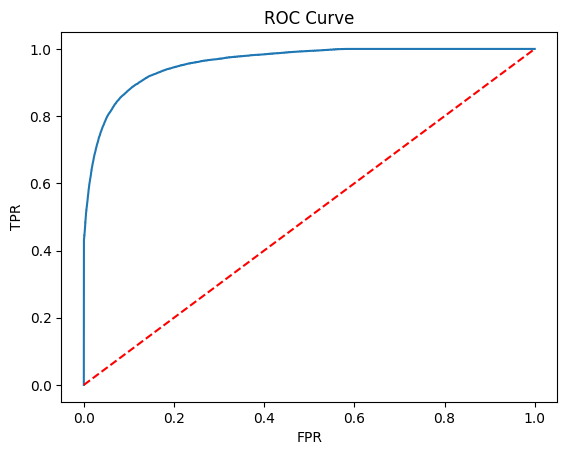

In [793]:
plt.plot(fpr, tpr)

#random model

plt.plot(fpr, fpr, '--', color = 'red')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [794]:
roc_auc_score(y_test, probabilities)

0.9597543106693195

#### PR Curve

In [795]:
precision, recall, thr = precision_recall_curve(y_test, probabilities)

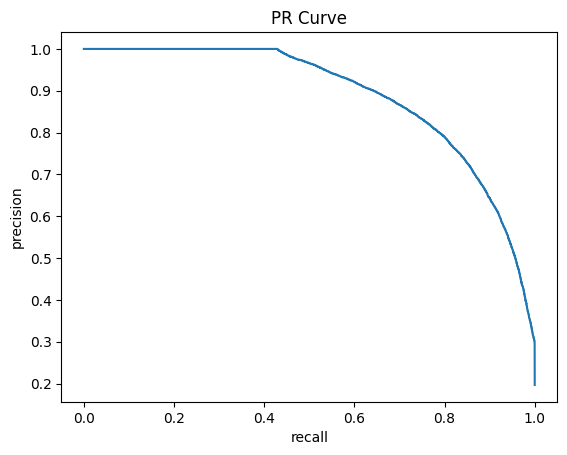

In [797]:
plt.plot(recall, precision)

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR Curve')
plt.show()

In [798]:
auc(recall, precision)

0.8881669306885851

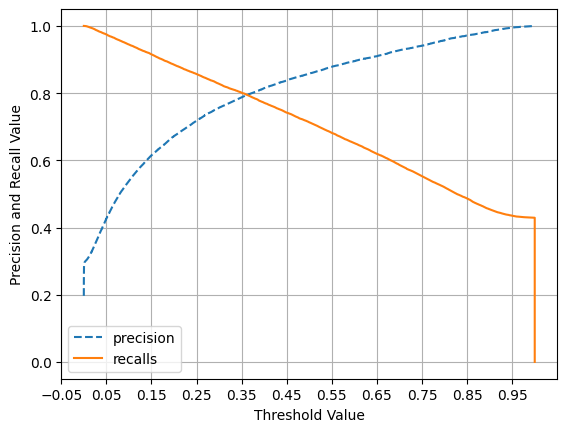

In [799]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:,1])

Threshold value here comes out to be almost 0.35

## Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [800]:
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [801]:
calc_vif(X)

,Feature,VIF
27,pub_rec_bankruptcies,5966.65
22,earliest_cr_line_month_no,4052.56
13,initial_list_status,2633.38
18,emp_length,2068.07
25,pub_rec,1990.96
23,state,1798.34
14,application_type,1505.02
21,issue_d_month_no,423.08
2,int_rate,212.17
4,sub_grade,187.51


In [802]:
X.drop(columns=['pub_rec_bankruptcies'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
22,earliest_cr_line_month_no,3703.96
13,initial_list_status,2533.00
18,emp_length,2006.58
23,state,1753.19
14,application_type,1475.18


In [803]:
X.drop(columns=['earliest_cr_line_month_no'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
13,initial_list_status,2267.53
18,emp_length,1849.24
22,state,1636.76
14,application_type,1395.47
24,pub_rec,1250.02


In [804]:
X.drop(columns=['initial_list_status'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
17,emp_length,1674.54
21,state,1513.27
13,application_type,1313.33
23,pub_rec,1175.88
20,issue_d_month_no,409.24


In [805]:
X.drop(columns=['emp_length'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
20,state,1319.10
13,application_type,1187.17
22,pub_rec,1082.78
19,issue_d_month_no,402.04
2,int_rate,210.15


In [806]:
X.drop(columns=['state'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
13,application_type,961.89
21,pub_rec,904.44
19,issue_d_month_no,387.45
2,int_rate,209.08
4,sub_grade,185.42


In [807]:
X.drop(columns=['application_type'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
20,pub_rec,539.96
18,issue_d_month_no,352.78
2,int_rate,206.63
4,sub_grade,183.79
21,mort_acc,123.39


In [808]:
X.drop(columns=['pub_rec'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
18,issue_d_month_no,221.72
2,int_rate,196.92
4,sub_grade,178.17
20,mort_acc,116.60
3,grade,105.41


In [809]:
X.drop(columns=['issue_d_month_no'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,int_rate,182.73
4,sub_grade,169.56
19,mort_acc,105.46
3,grade,105.38
17,earliest_cr_line_year,87.23


In [810]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,grade,105.26
18,mort_acc,104.74
3,sub_grade,104.27
16,earliest_cr_line_year,84.12
7,purpose,80.92


In [811]:
X.drop(columns=['grade'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
17,mort_acc,104.73
15,earliest_cr_line_year,84.09
6,purpose,80.91
3,home_ownership,68.68
12,title,46.07


In [812]:
X.drop(columns=['mort_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,purpose,77.25
15,earliest_cr_line_year,72.56
3,home_ownership,50.26
12,title,45.96
5,verification_status,36.52


In [813]:
X.drop(columns=['purpose'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
14,earliest_cr_line_year,67.31
3,home_ownership,47.50
5,verification_status,35.60
11,title,34.35
13,issue_d_year,23.30


In [814]:
X.drop(columns=['earliest_cr_line_year'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
3,home_ownership,33.70
5,verification_status,33.68
11,title,33.05
13,issue_d_year,22.68
10,emp_title,16.75


In [815]:
X.drop(columns=['home_ownership'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
10,title,30.42
4,verification_status,29.09
12,issue_d_year,22.16
9,emp_title,16.09
6,open_acc,13.83


In [816]:
X.drop(columns=['title'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
4,verification_status,26.91
11,issue_d_year,18.17
9,emp_title,15.03
6,open_acc,13.78
1,term,13.05


In [817]:
X.drop(columns=['verification_status'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
10,issue_d_year,16.58
5,open_acc,13.71
8,emp_title,13.37
1,term,12.59
7,total_acc,11.78


In [818]:
X.drop(columns=['issue_d_year'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
5,open_acc,13.51
1,term,12.13
7,total_acc,11.76
8,emp_title,10.71
3,annual_inc,8.17


In [819]:
X.drop(columns=['open_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,12.13
7,emp_title,10.47
3,annual_inc,8.06
6,total_acc,7.44
8,revol_util,7.30


In [820]:
X.drop(columns=['term'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,emp_title,9.66
2,annual_inc,7.98
5,total_acc,7.32
7,revol_util,7.30
3,dti,7.10


In [821]:
X.head()

,loan_amnt,sub_grade,annual_inc,dti,revol_bal,total_acc,emp_title,revol_util,zip_code
0,10000.0,0.138393,117000.0,26.24,36369.0,25.0,0.247140,41.8,0.193784
1,8000.0,0.155037,65000.0,22.05,20131.0,27.0,0.217322,53.3,0.000000
2,15600.0,0.123354,43057.0,12.79,11987.0,26.0,0.191993,92.2,0.000000
3,7200.0,0.048186,54000.0,2.60,5472.0,13.0,0.170611,21.5,0.000000
4,24375.0,0.245067,55000.0,33.95,24584.0,43.0,0.300719,69.8,1.000000


In [822]:
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.919


## SMOTE

Oversampling be creating synthetic samples for minority class which is class 1 here i.e. defaulters to make the no of samples for class 1 same as class 0

In [835]:
smt = SMOTE()

In [836]:
print('Before SMOTE')
y_train.value_counts()

Before SMOTE


is_defaulter
0.0    222918
1.0     54303
Name: count, dtype: int64

In [837]:
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('After SMOTE')
y_sm.value_counts()

After SMOTE


is_defaulter
0.0    222918
1.0    222918
Name: count, dtype: int64

In [838]:
model_smote= LogisticRegression(max_iter=1000)

In [839]:
def training(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  print(classification_report(y_test, test_y_pred))

  return train_score, test_score

In [840]:
f1_train, f1_test = training(model_smote, X_sm, X_test, y_sm, y_test)

print(f'Training F1 score: {f1_train}, Testing F1 score: {f1_test}')

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.88      0.77     23370

    accuracy                           0.89    118809
   macro avg       0.82      0.89      0.85    118809
weighted avg       0.91      0.89      0.90    118809

Training F1 score: 0.8950805398345668, Testing F1 score: 0.7658241921138453


We can see that training F1-score after SMOTE has significantly inceased from 0.779 to 0.895 and the testing score has decreased from 0.779 to 0.765.

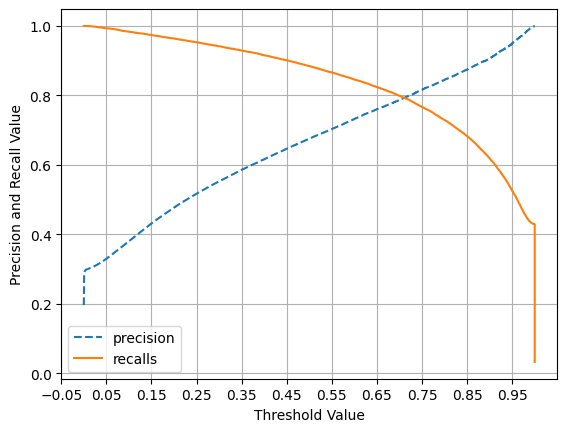

In [841]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model_smote.predict_proba(X_test)[:,1])

Threshold value has increased after SMOTE from 0.35 to 0.7

### Hyperparameter Tuning

#### L2

In [842]:
model_l2 = LogisticRegression(C = 5, penalty = 'l2', solver = 'liblinear')

In [843]:
f1_train, f1_test = training(model_l2, X_sm, X_test, y_sm, y_test)

print(f'Training F1 score: {f1_train}, Testing F1 score: {f1_test}')

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.88      0.77     23370

    accuracy                           0.89    118809
   macro avg       0.82      0.89      0.85    118809
weighted avg       0.91      0.89      0.90    118809

Training F1 score: 0.8951170091260161, Testing F1 score: 0.7657390595471893


##### Tuning lambda values (C) with penalty L2

In [845]:
lambda_values = [0.1, 0.01, 0.001, 0.0001, 10, 100]

for lambda_val in lambda_values:
  model_l2 = LogisticRegression(C = lambda_val, penalty = 'l2', solver = 'liblinear')
  f1_train, f1_test = training(model_l2, X_sm, X_test, y_sm, y_test)
  print('Lambda value: ', lambda_val)
  print(f'Training F1 score: {f1_train}, Testing F1 score: {f1_test}')

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.88      0.77     23370

    accuracy                           0.89    118809
   macro avg       0.82      0.89      0.85    118809
weighted avg       0.91      0.89      0.90    118809

Lambda value:  0.1
Training F1 score: 0.8950678523812303, Testing F1 score: 0.766201987246033
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.88      0.77     23370

    accuracy                           0.89    118809
   macro avg       0.82      0.89      0.85    118809
weighted avg       0.91      0.89      0.90    118809

Lambda value:  0.01
Training F1 score: 0.8946107407590543, Testing F1 score: 0.7670606601248885
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.87      0.77    

The F1-scores for train and test are almost same for all the values though highest for 0.1

#### L1

In [844]:
model_l1 = LogisticRegression(C = 5, penalty = 'l1', solver = 'liblinear')

f1_train, f1_test = training(model_l1, X_sm, X_test, y_sm, y_test)

print(f'Training F1 score: {f1_train}, Testing F1 score: {f1_test}')

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     95439
         1.0       0.68      0.88      0.77     23370

    accuracy                           0.89    118809
   macro avg       0.82      0.89      0.85    118809
weighted avg       0.91      0.89      0.90    118809

Training F1 score: 0.8951174798216542, Testing F1 score: 0.7658076588176446


L1 and L2 both are giving almost same F1-scores for train and test data.

## Class weight

Using class weight algorithm to use the weight calculated as (no of samples in majority class / no of samples in minority class) for minority class and 1 for majority class

In [846]:
wt = y_train.value_counts()[0]/y_train.value_counts()[1]

In [847]:
wt

4.105077067565328

In [848]:
model = LogisticRegression(class_weight={0: 1, 1: wt})

In [849]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 4.105077067565328})

In [850]:
pred_y_test = model.predict(X_test)

Testing F1-score

In [851]:
f1_score(y_test, pred_y_test)

0.7629366641526094

Training F1-score

In [852]:
f1_score(y_train, pred_y_train)

0.7793166011490779

Both train and test F1-scores are poor as compared to other options that we tried

Thus, we can see that simple logistic regression model is giving higher F1-score of 0.779 for testing but SMOTE has significantly better taining F1-score of ~0.9 and testing F1-score of 0.766

#Actionable insights and recommendations

* Around 80% of customers have fully paid their Loan amount. The defaulters are ~20%. From Personal loan business perspective, this ratio is high. These 20% will contribute in NPAs of LoanTap. To reduce the risk of NPAs:
** LoanTap should add slightly stringent rules to bring down this ratio to 5% to 6%.
** LoanTap should provide loans at slightly higher rate than other banks. This will offset the risks of defaulters and maintain the profitability of the business.
* The loan term 60 months has negative coefficient which means more chances of unlikely to pay. Which means LoanTap should focus more on loans for shorter duration (i.e. 36 months). Their social media campaign and marketing strategy should be based on this consideration.
* Overall statistics of the model [Classification Metrics]:
** Accuracy --> 92%
** Precision --> 86%
** Recall --> 71%
** F1-score --> 78%
* Precision is higher than recall which means that false positives is lesser than false negatives.That means LoanTap will not lose the potential clients that much with this model but might struggle in identifying NPAs.
* Features which have significant impact on outcome are as follow:

1. int_rate: Interest Rate
2. sub_grade: loan subgrade
3. term : number of payments on the loan
4. application_type
5. zip code (from address)
6. emp_title: job title supplied by the Borrower

* The sub_grade and grade logic to classify person by LoanTap is well created. From the model pov, it is considered to be significant.
** For the loan ratings 'A', 'B', 'C' and 'D', there's a huge difference between the no of defaulters and non-defaulters and no of non-defaulters is high which means more likely loan will be paid but for grades 'E', 'F' ad 'G', these nos are almost same that means high risk ratings.
** Thus, we can say that grades 'A', 'B' and 'C' are low risk, grades 'D' and 'E' are moderate risk and 'F' and 'G' are high risk.
** Similar pattern observed for the sub-grades with 1 being low risk in that grade and 5 being high risk.
** So overall, A1 is lowest risk and G5 is the highest risk.

So it's recommended to avoid approving the loan for highest risk customers.

* Distribution of loan status across States:
State codes 'AP', 'AE' and 'AA' are the top 3 states from which loan applications have been received (in same order).
For all other states, it's almost similar. Thus, distribution is different across states.
So, it's recommended that LoanTap should focus more on getting more customers from these 3 states as they are also more likely to repay the loan.


* Distribution of loan status across zip codes:
** We can see that the distribution of borrowers w.r.t. their loan status is significantly different as per the zip codes.
Zip codes: 05113, 00813, 29597 are having only non-defaulters where as the zip codes: 11650, 86630, 93700 are having only defaulters.
So, it's recommended that LoanTap should focus more on getting customers from zip codes  05113, 00813, 29597.  

* Among the borrowers with initial list status as 'w' i.e. whole the difference between defaulters and non-defaulters is lesser as compared to 'f' which means that more chance of defaulting when entire amount is approved.

So, it's recommended to approve only fractional amount in the beginning.

* Employee tenure, income verification status, purpose of loan, home ownership status and loan application type do not make much impact on defaulting.

* Chances of defaulting is the least for home_ownership as 'Mortgage' so recommended to gather more borrowers having this criteria met

* We can see that when either negative records on borrower's public credit profile are present or bankruptcy records are available for borrower, then there are more chances of defaulting.

So, it's recommended to avoid approving the loan when negative records are found or bankruptcy is found.












In [ ]:
'''
Questionnaire:

1. What percentage of customers have fully paid their Loan Amount?
Ans--> We can see that 80.4% are non-defaulters and 19.6% are defaulters.

2. Comment about the correlation between Loan Amount and Installment features.
Ans--> The correlation coefficient is the highest for loan amount and installment features which is +0.97 which tells us that greater the loan amount, greater will be the monthly installment amount.

3. The majority of people have home ownership as _______.
Ans--> 'Mortgage'

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Ans--> True

5. Name the top 2 afforded job titles.
Ans--> 'Teacher' followed by 'Manager'

6. Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Precision
Recall
F1 Score
Ans--> The best metric to consider is : F1-score
As we need to give equal importance to both precision and recall.
We don't want to miss potential customers and at the same time we also don't want to give loan to defaulters


7. How does the gap in precision and recall affect the bank?
Ans-->
Precision 86% and Recall 71%
Precision is higher than recall which means that false positives is lesser than false negatives.
That means LoanTap will not lose the potential clients that much with this model might struggle in identifying NPAs.
From confusion matrix, % of misclassified points in each class:
class 0: 2.88%
class 1: 28.69%
If Recall value is low (i.e. FN is high), it means Bank's NPA (defaulters) may increase.
If Precision value is low (i.e. FP is high), t means Bank is losing in opportunity cost.


8. Which were the features that heavily affected the outcome?
Ans--> Features with higher posititive coefficients:
zip_code
emp_title
title
term
sub_grade
revol_util
int_rate
open_acc
dti
home_ownership
loan_amnt


9. Will the results be affected by geographical location? (Yes/No)
Ans--> Yes
Distribution across States:
State codes 'AP', 'AE' and 'AA' are the top 3 states from which loan applications have been received (in same order).
For all other states, it's almost similar. Thus, distribution is different across states.

Distribution across zip codes:
We can see that the distribution of borrowers w.r.t. their loan status is significantly different as per the zip codes.
Zip codes: 05113, 00813, 29597 are having only non-defaulters where as the zip codes: 11650, 86630, 93700 are having only defaulters.

'''